<a href="https://colab.research.google.com/github/sergiomora03/AdvancedTopicsAnalytics/blob/main/notebooks/IntroDataDrift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is data drift?


> TL;DR. Data drift is a shift in the distributions of the ML model input features.




Data drift is a change in the statistical properties and characteristics of the input data. It occurs when a machine learning model is in production, as the data it encounters deviates from the data the model was initially trained on or earlier production data.

This shift in input data distribution can lead to a decline in the model's performance. The reason is, when you create a machine learning model, you can expect it to perform well on data similar to the data used to train it. However, it might struggle to make accurate predictions or decisions if the data keeps changing and the model cannot generalize beyond what it has seen in training.

In simple terms, data drift is a change in the model inputs the model is not trained to handle. Detecting and addressing data drift is vital to maintaining ML model reliability in dynamic settings.



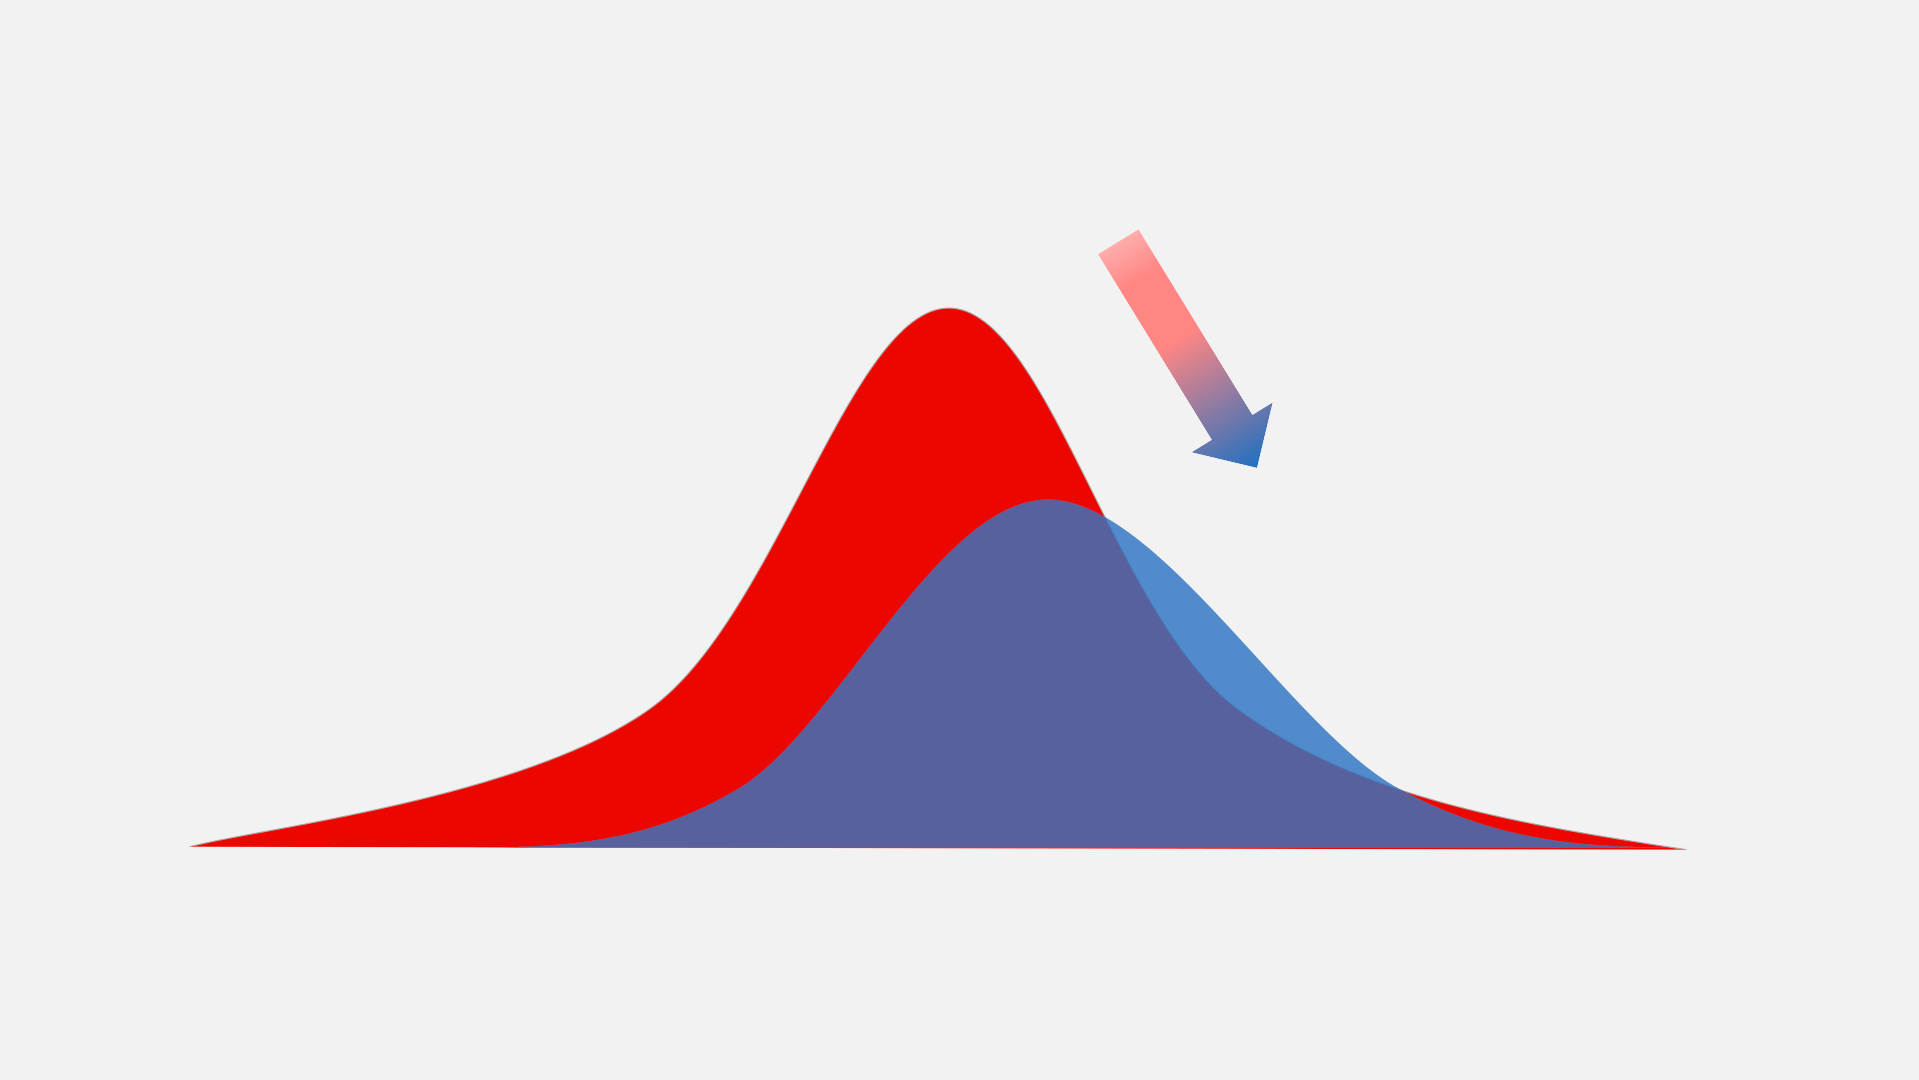

**Let’s take a simple example. **

Imagine a retail chain that uses machine learning to predict how many products of a particular type they need to stock in each of their stores. They trained their model using historical sales data from the past few years.

Until now, most of their sales have been in physical stores, and their model has become quite good at forecasting demand for in-store products. However, as the retailer ran a marketing campaign to promote their new mobile app, there's been a significant shift towards online sales, especially for some product categories.

The training data didn't have enough online sales information, so the model didn't perform as well for this segment. But it didn't matter much because online sales were a small part of their business. With the surge in online shopping, the quality of the model's forecasts has significantly dropped, affecting their ability to manage inventory effectively.

This shift in sales channels, from predominantly in-store to largely online, is an example of data drift.

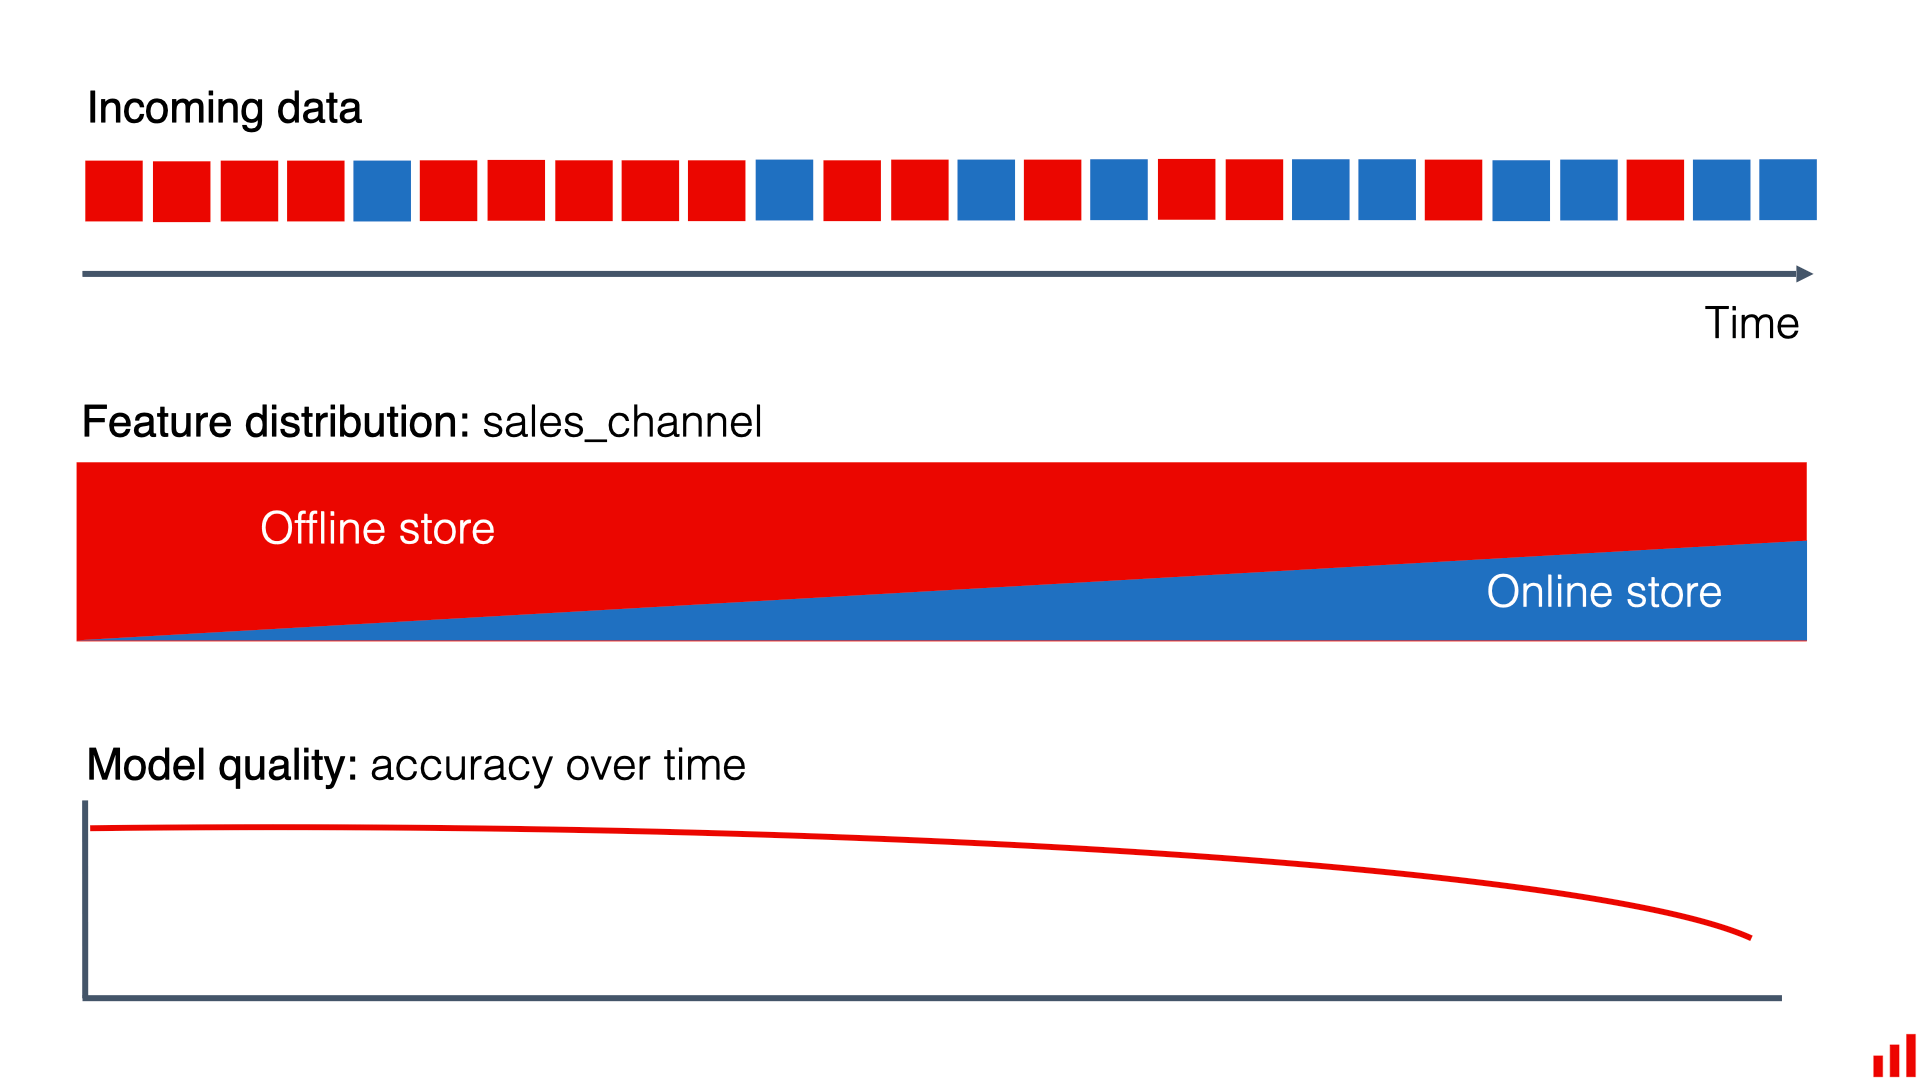

A few terms related to data drift are concept drift, model drift, prediction drift, and training-serving skew. The topic of data drift also comes up in data engineering and data analysis outside machine learning, where it might take a different meaning. Let’s explore these differences in more detail.  



> **‍A word of caution:** none of these terms is strictly defined! Examining them helps grasp various factors that impact a machine learning model in production. However, in the real world, these semantic distinctions are rarely important. Multiple changes can happen simultaneously, and practitioners tend to use these terms interchangeably.



## Types of concept drift

There are different types of concept drift patterns one can observe in production. Let’s dive into those and explore some examples.

### Gradual concept drift

When referring to “drift,” we usually expect a gradual change. After all, this is what the word itself means – a slow change or movement.

This is the most frequent type of drift indeed. Gradual drift happens when the underlying data patterns change over time.

For example, consider a model that predicts user preferences for movies. As people’s tastes evolve and new movies are released, the model will make less and less relevant suggestions – unless you update and retrain it. In cases like fraud detection, you have to account for the bad actors adapting and coming up with new fraud attacks over time.

This gradual drift is almost an in-built property of a machine learning model. When you create the model, you know it will not perform as well as in training indefinitely. The world will change sooner or later.

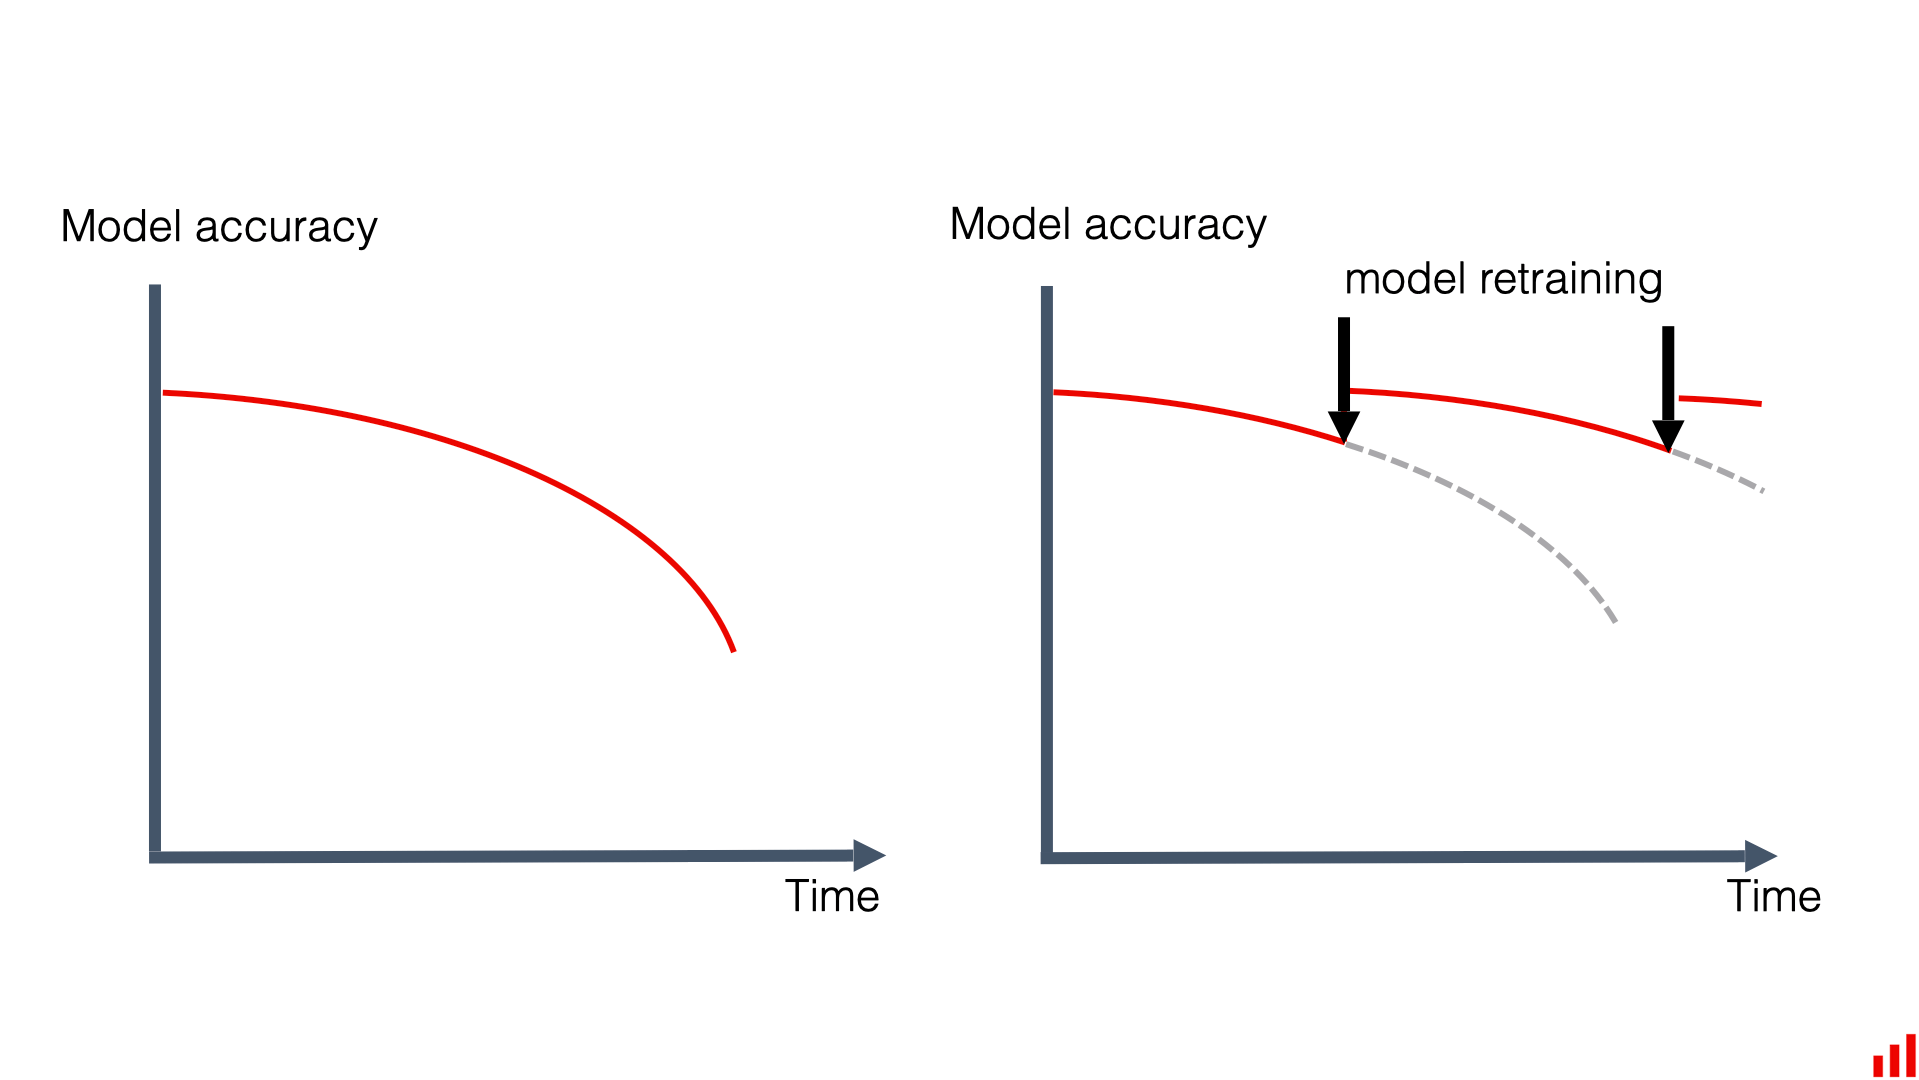

In production, you can often observe a smooth decay in the core model quality metric over time. The exact speed of this decay varies and heavily depends on the modeled process and rate of change in the environment. It can be hours or days for fast-changing user preferences or months and years for stable processes like manufacturing.  

Example: Spotify frequently retrains a model that recommends new podcasts on the home screen – so that the model can recommend newly published shows. However, the model that suggests best shortcuts to the user does not require frequent updates. Source: [The Rise (and Lessons Learned) of ML Models to Personalize Content on Home.](https://engineering.atspotify.com/2021/11/the-rise-and-lessons-learned-of-ml-models-to-personalize-content-on-home-part-ii/)

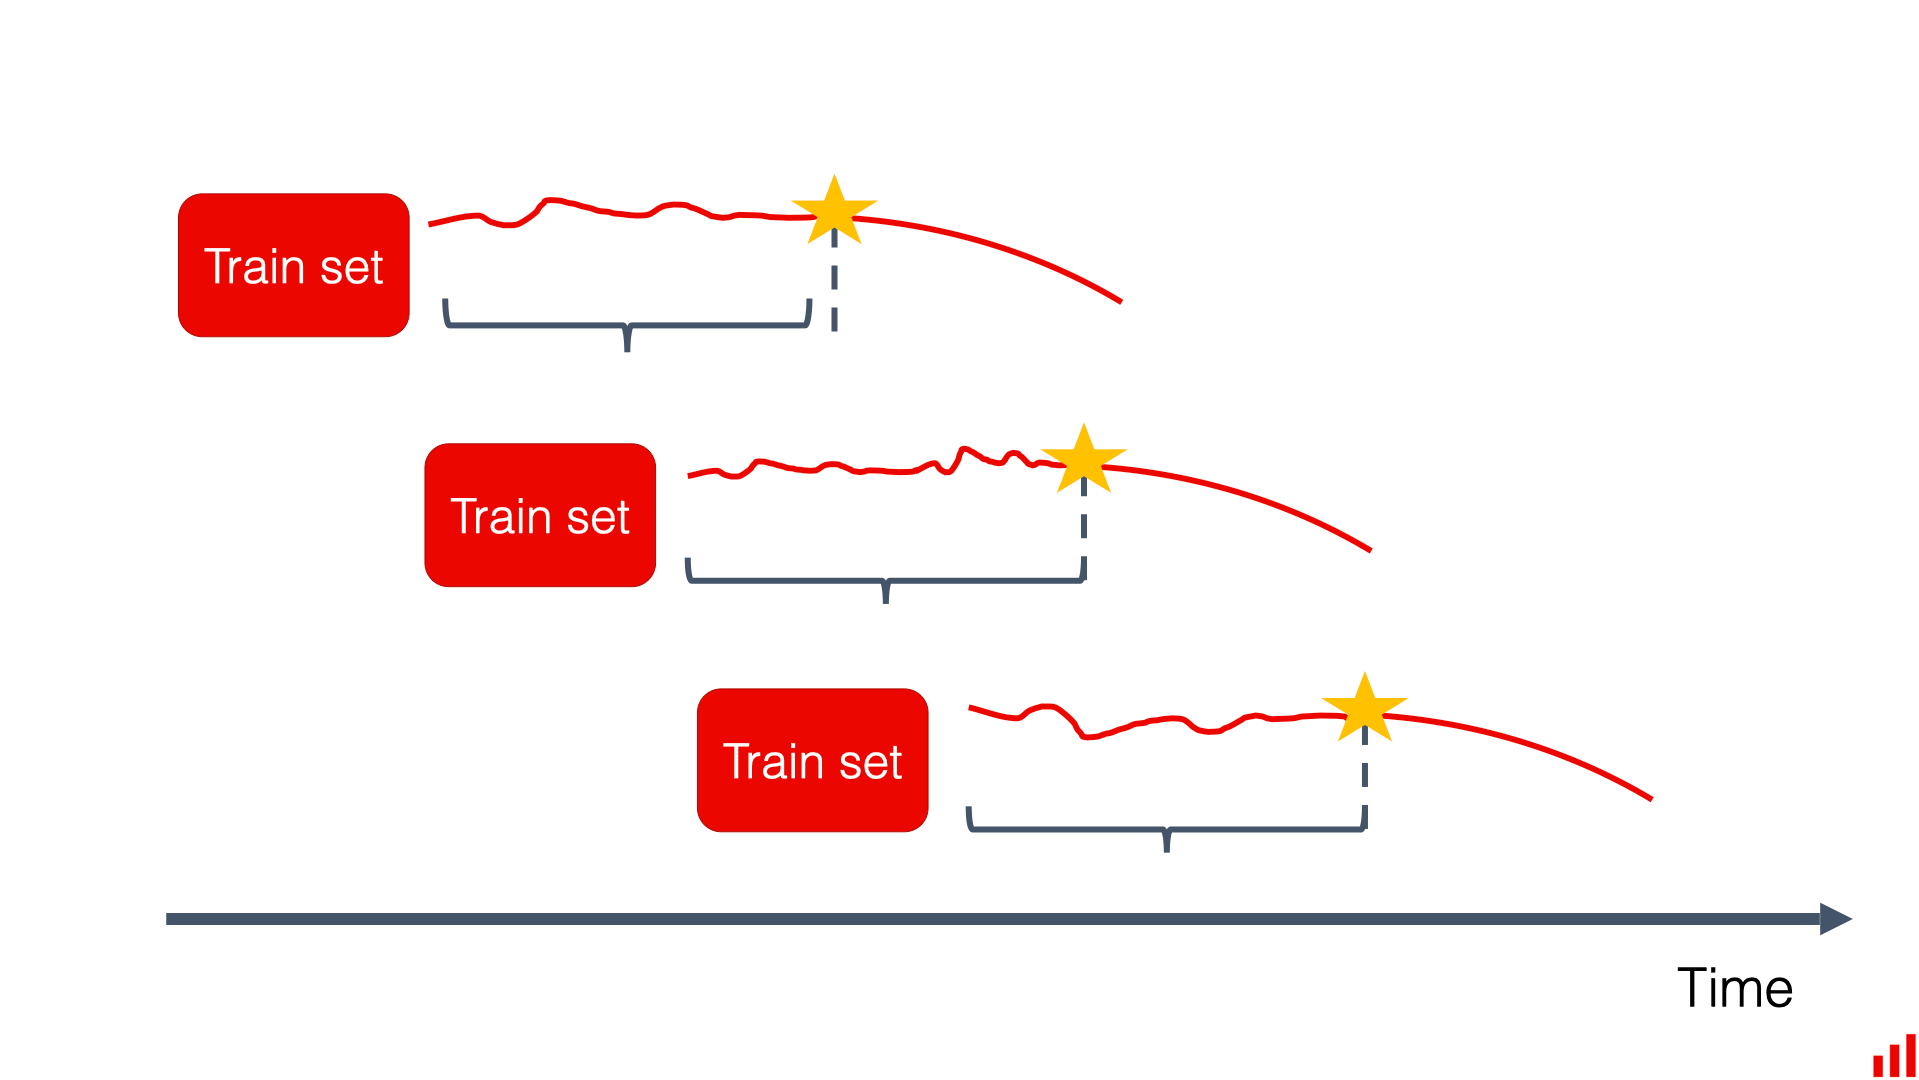

To prepare for the gradual concept drift, you can evaluate the speed of the model decay and environmental changes in advance and plan for a periodic model retraining. For example, you can update your models daily, weekly or monthly.



### Sudden concept drift

Sudden concept drift is the opposite: an abrupt and unexpected change in the model environment.

Imagine you're predicting product sales, and a new competitor enters the market with a heavily discounted product, completely changing customer behavior. This sudden shift can catch models off guard.

Another example could be a complete change to the modeled process. Imagine that your model processes input data about user interactions in the app to predict the likelihood of conversions and recommend specific content. If you update the application design and add new screens and flows, the model trained on the events collected in the older version will become obsolete.

If you are working on revenue projections or credit scoring models, any significant macroeconomic changes, such as a change in the interest rate, might make your previous model outdated.



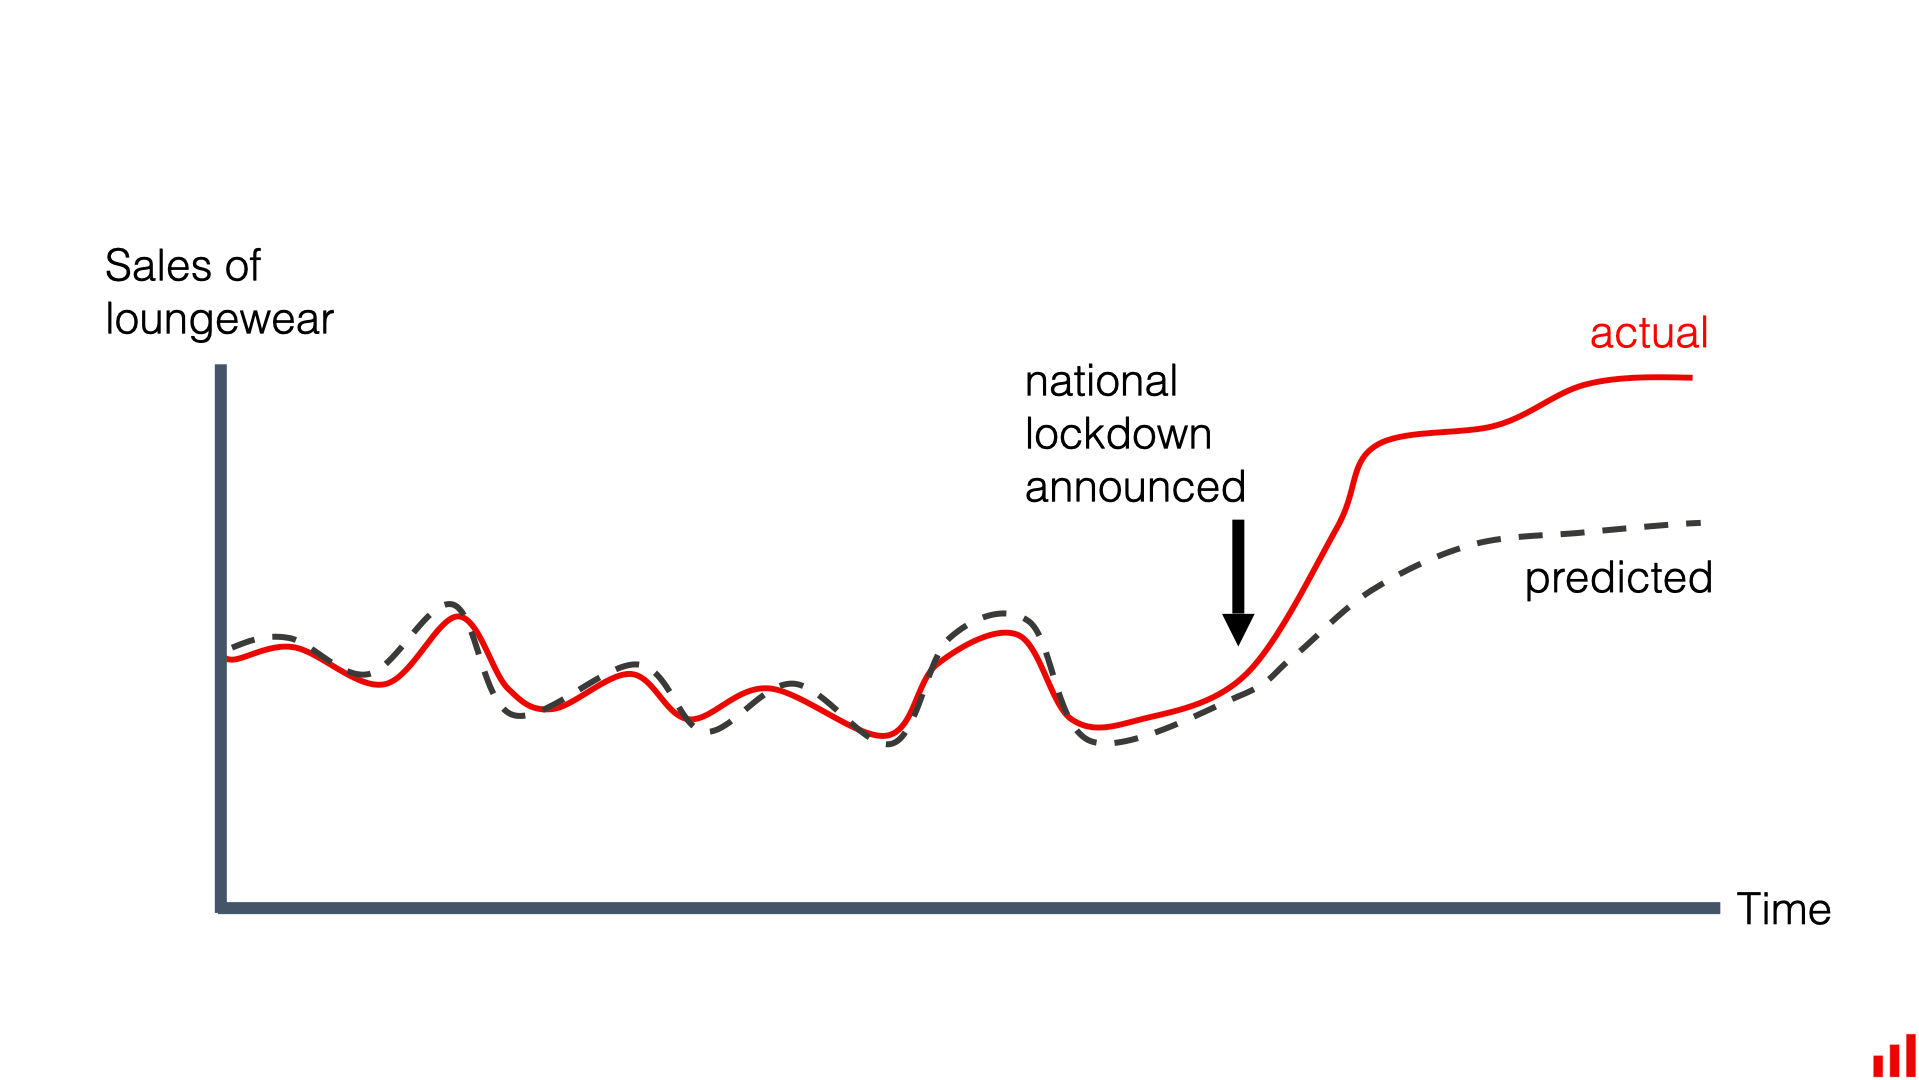

COVID-19 was a perfect example of a drastic change that affected all ML models across industries.



> Example: Instacart has models to predict the availability of grocery items. From the onset of COVID-19, they faced challenges due to the evolving shopping patterns and disruptions caused by the pandemic. They had to update the architecture of their models, for example, by implementing dynamic thresholds. Source: [How Instacart's Item Availability Evolved Over the Pandemic.](https://www.instacart.com/company/how-its-made/how-instacarts-item-availability-evolved-over-the-pandemic/)



Many of such drastic changes are hard to miss. However, the possibility of facing an unannounced change in production – even on a smaller scale – is one of the reasons why you might want to set up ML model monitoring even if you retrain the models regularly.

### Recurring concept drift

Sometimes, practitioners refer to "recurring" concept drift, meaning pattern changes that happen repeatedly or follow a cycle.

For instance, in a sales model, you might notice sales going up during holidays, discount periods, or Black Fridays. Ice cream sales differ by season, and weekends often have different patterns than business days.

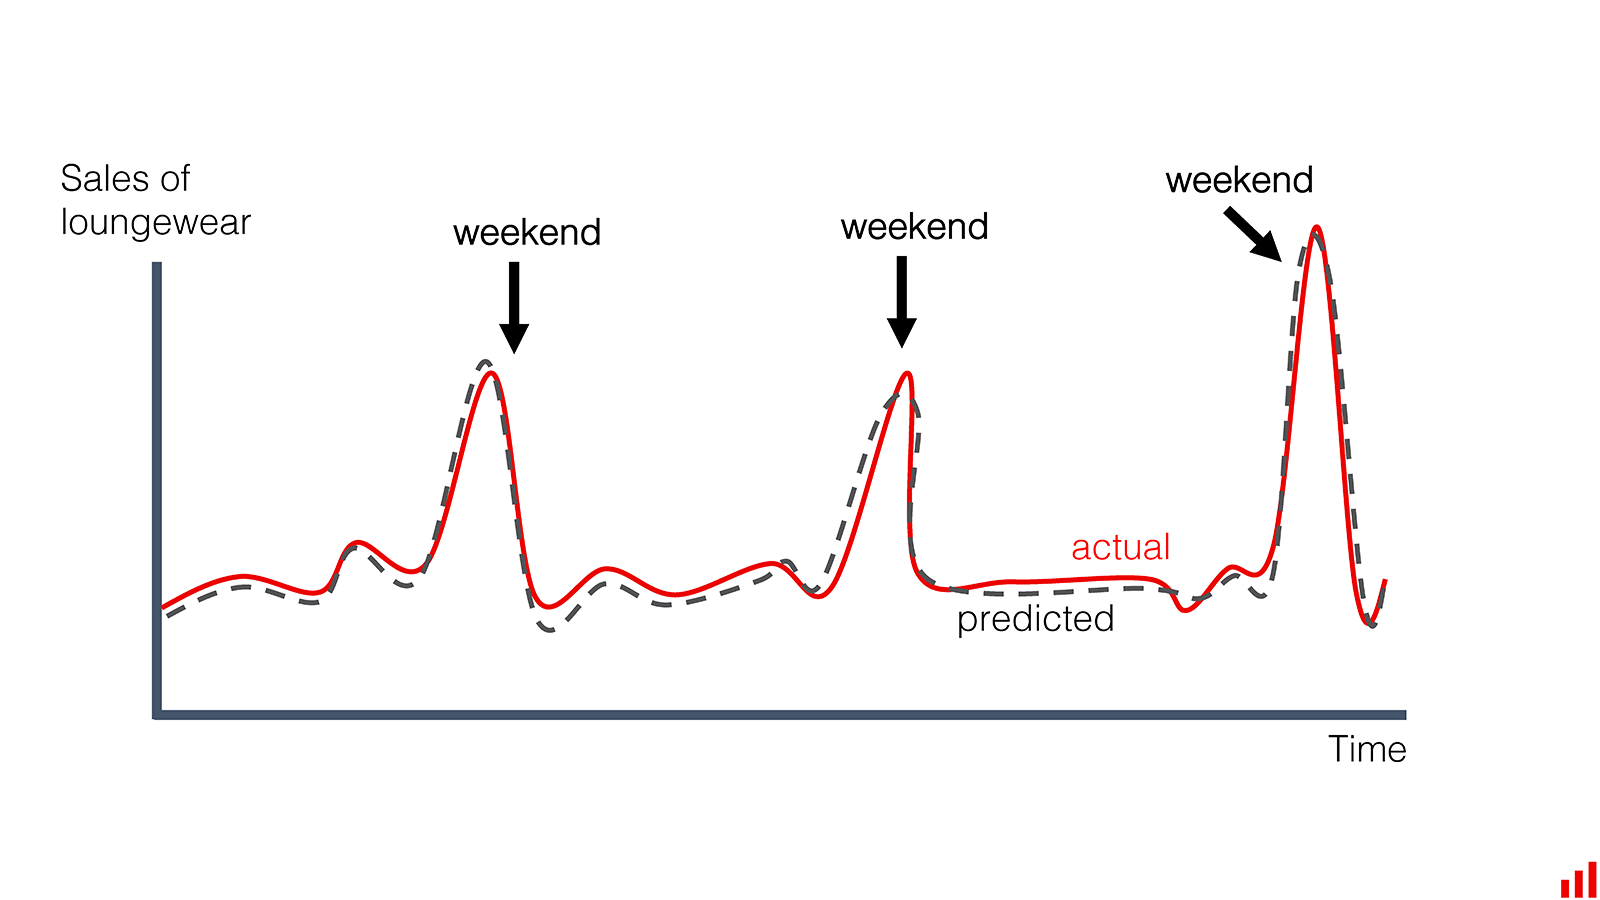

It's important to know that many of these recurring changes are systematic, and you can account for them in modeling. You can pick model architectures that can handle seasonality well and may adapt to these patterns, ensuring accurate predictions even when concept drift happens periodically. You can also build ensemble models or switch between models to account for cyclic changes and special events in your system design.

However, you might also encounter recurring drops in model performance in production that you can't address directly. For instance, many users may sign up for a service during specific periods, but they leave shortly afterward. This can lead to a decline in the quality of your marketing and upsell models.

Understanding the nature of these events can be helpful for monitoring. Sometimes, you might avoid reacting to the drop in model quality as long as it still performs well enough for your core user segment. Additionally, it's essential to ensure that you don't retrain the model using the data that doesn't represent the usual patterns.

## Data drift vs. Concept drift




> TL;DR. Data drift is a change in the input data. Concept drift is a change in input-output relationships. Both often happen simultaneously.



While data drift describes changes in the data distribution, concept drift relates to changes in the relationships between input and target variables. Basically, concept drift means that whatever your model is predicting – it is changing.



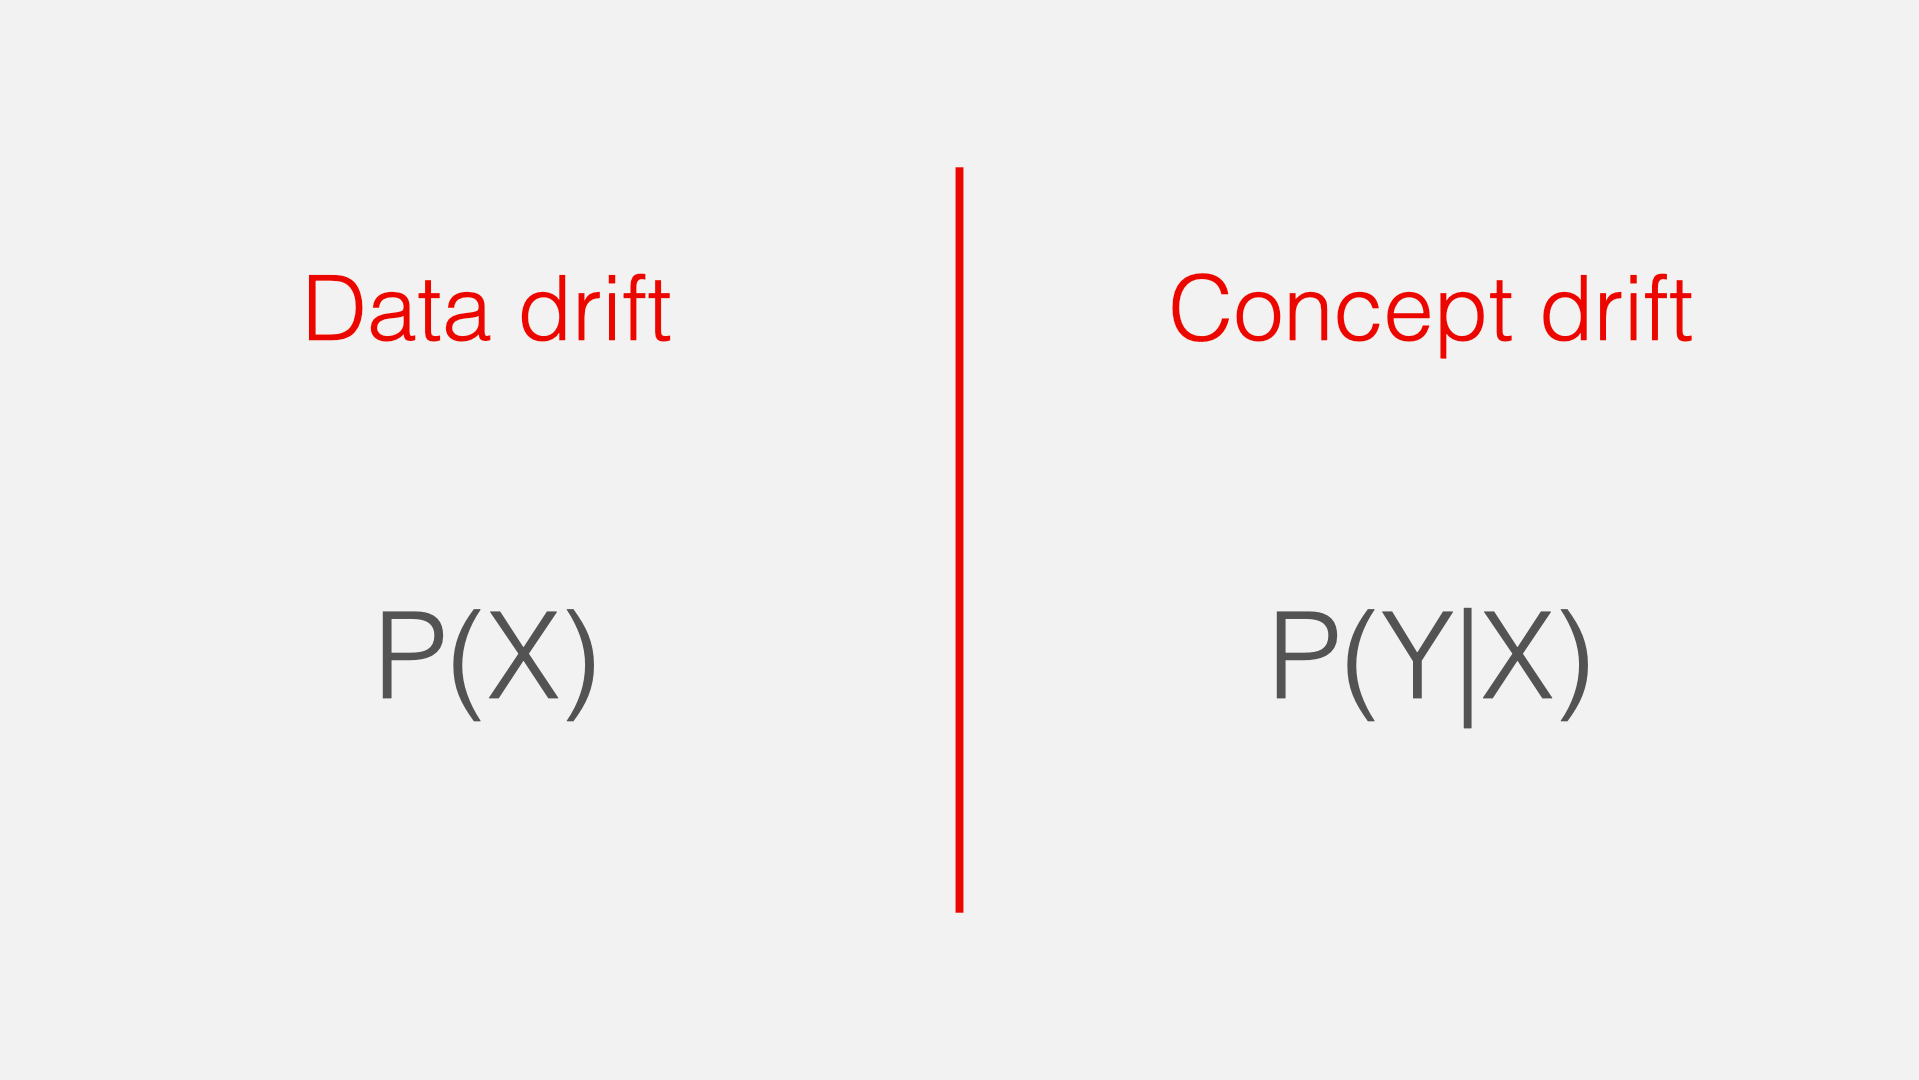

**Data drift** might be a symptom of concept drift, and both often co-occur. However, it is not a must. In the example with retail sales forecasting above, there can easily be no concept drift. The shopping preferences of customers, both online and offline, might remain consistent. The same goes for the average basket size per channel. However, a new marketing campaign reshapes the distribution of shopper segments. The model quality might drop because a segment it performs worse on became larger – not because the patterns have changed. This is data drift without concept drift.  

An example of **concept drift** could be a new competitor offering massive discounts on the same product groups your retail store sells. This could shift shopper behavior, resulting in a drastic decrease in the average basket size in offline stores. This could, in turn, lead to inaccurate forecasts. Another instance could be the onset of COVID-19, which transformed how people shopped and disrupted logistical patterns. In these cases, all previously created models became almost obsolete.

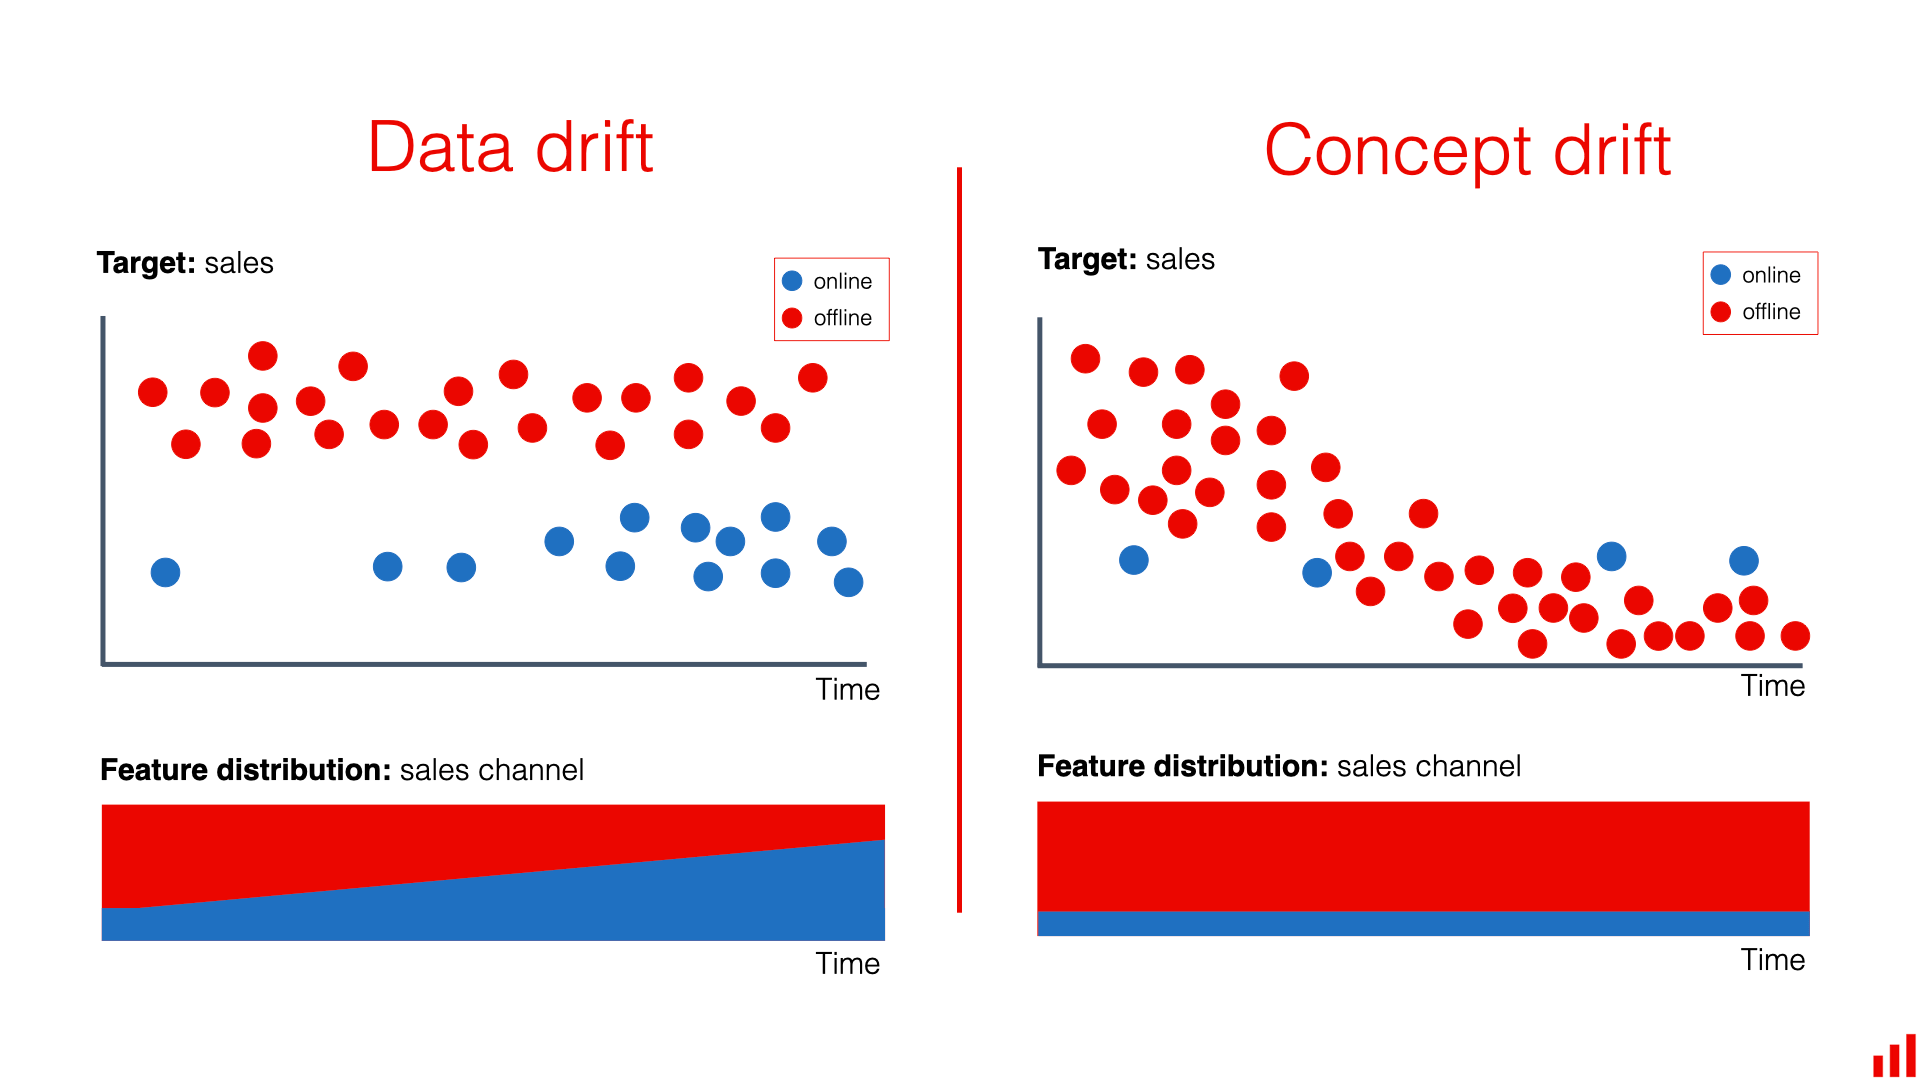

**The difference: **Data drift refers to the shifts in input feature distributions, whereas concept drift refers to shifts in the relationships between model inputs and outputs.

**The similarity:** Both data drift and concept drift can result in a decline in model quality and often coincide. In monitoring, data distribution drift can be a symptom of concept drift.

## Data drift vs. Prediction drift



> **TL;DR.** Data drift is a change in model inputs, while prediction drift is a change in the model outputs.



When discussing data drift, we typically refer to the input features that go into the model. Prediction drift, in comparison, is the distribution shift in the model outputs.

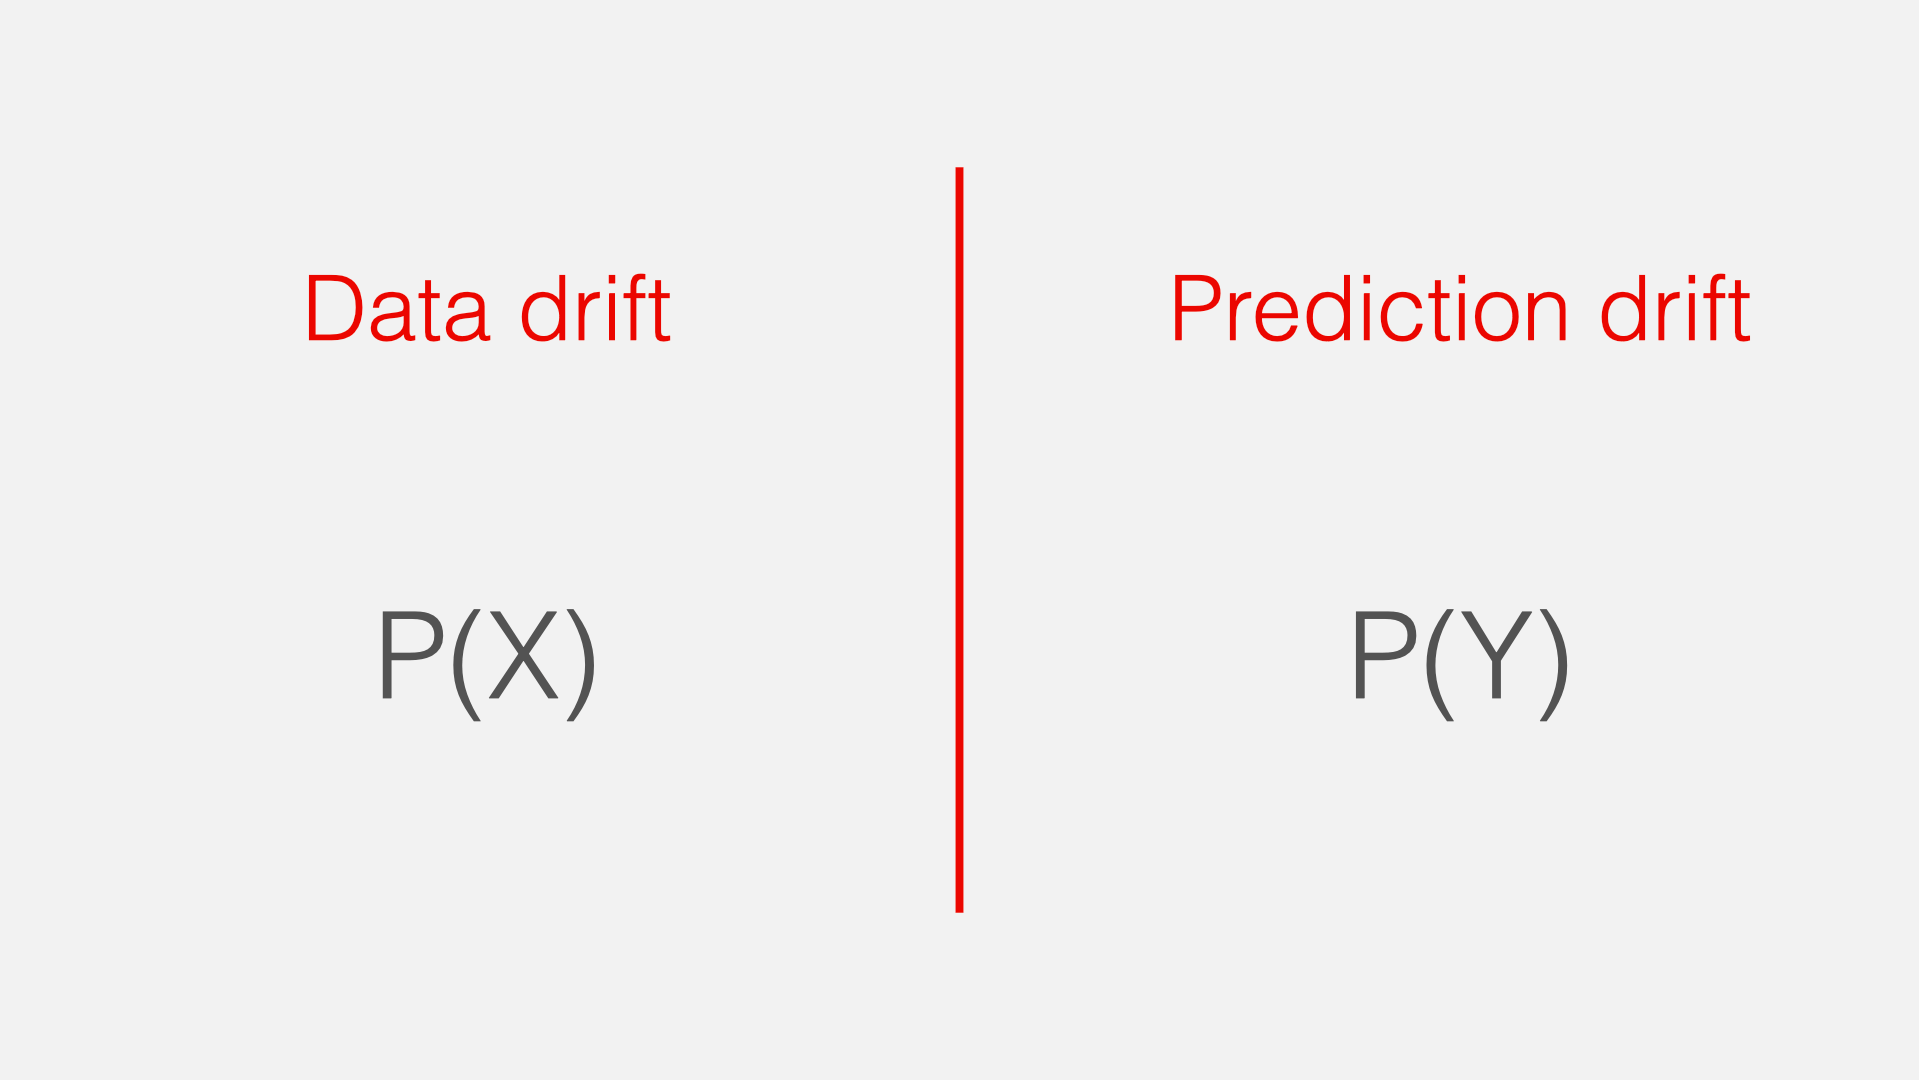

The shift in model outputs can signal changes in the environment or issues with the model quality. Often, this is the best proxy if you cannot directly measure the model performance. Imagine that a fraud model starts to predict fraud more often. Or, a pricing model is now showing significantly lower prices. The change in the model predictions is a good reason to investigate.

**Prediction drift** can signal many issues, from low-quality data inputs to concept drift in the modeled process. At the same time, prediction drift does not always imply model deterioration. It can also occur if the model adjusts well to the new environment. For example, if there is an actual increase in fraud attempts, you can expect that the distribution of the predicted fraud cases will look different. In this case, you could observe both feature and prediction drift without a decay in the model quality.



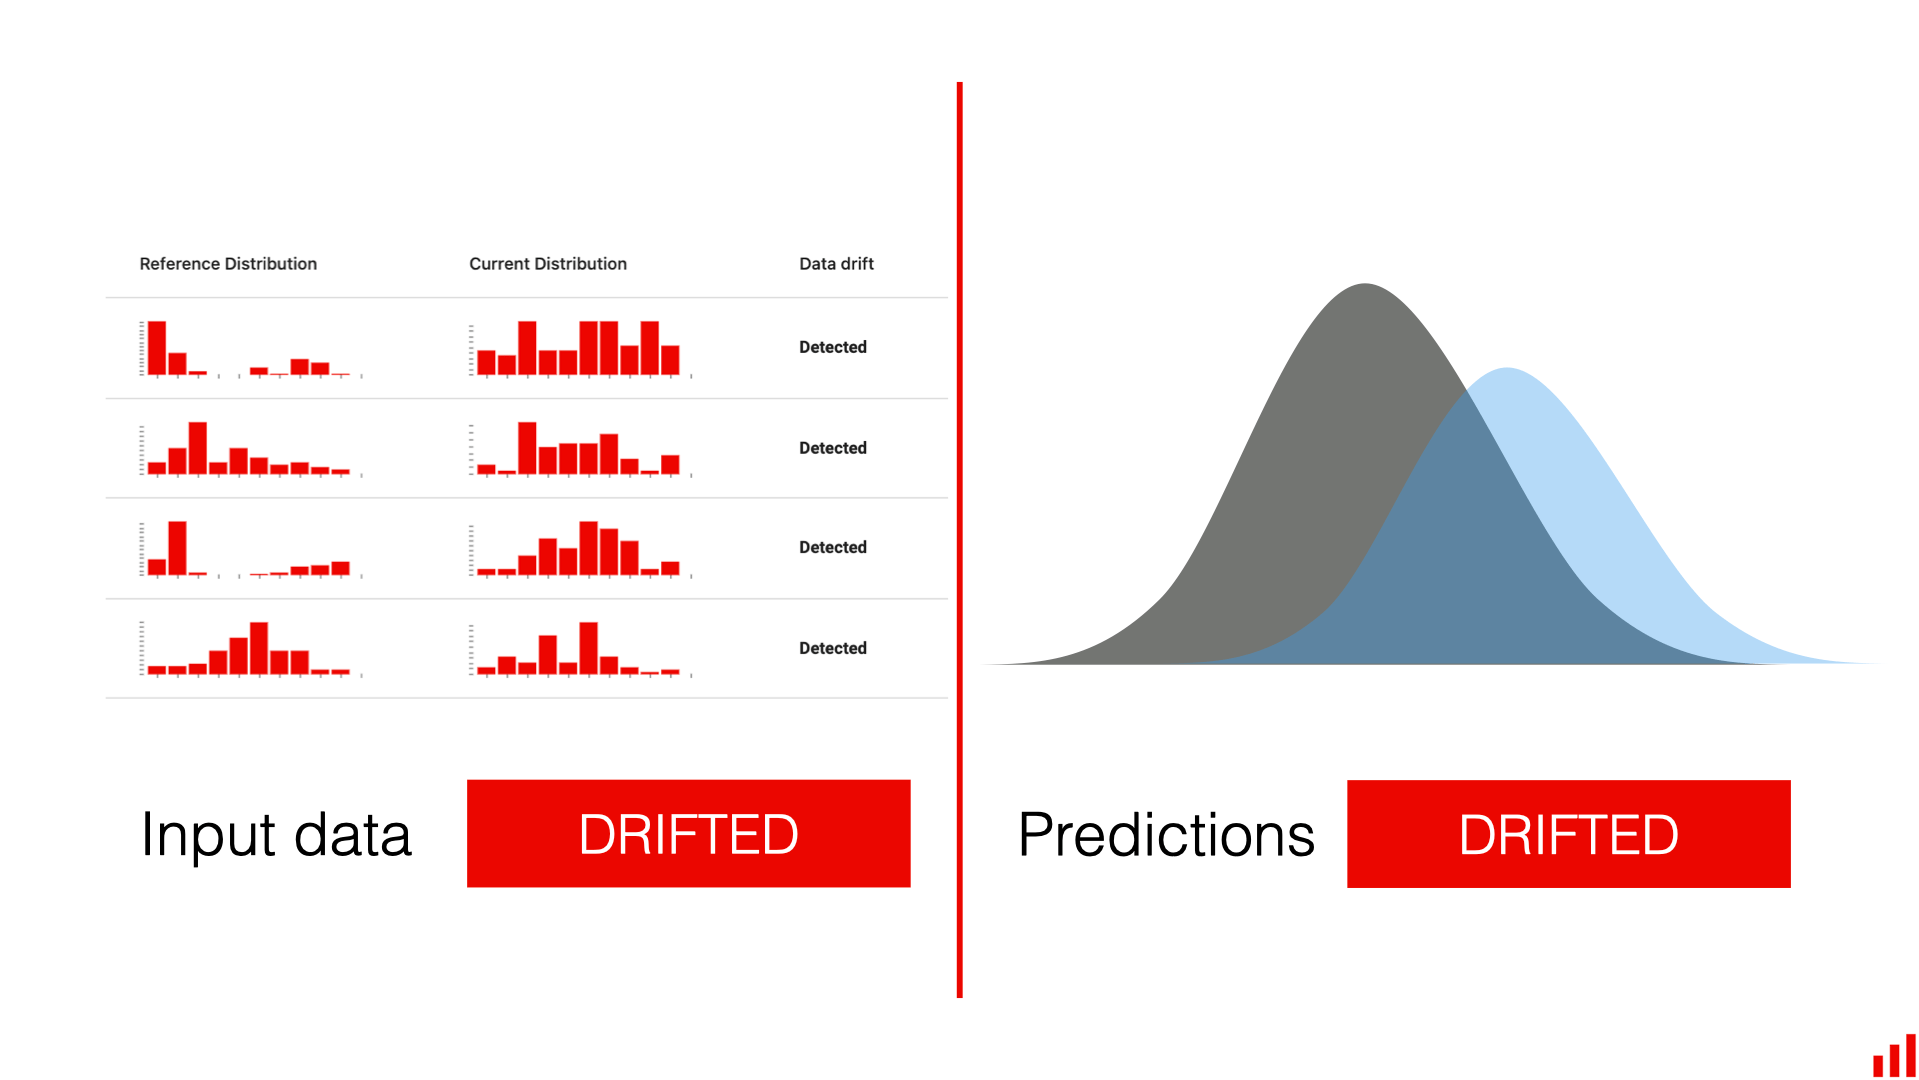

It's worth noting that sometimes practitioners refer to data drift or **dataset shift** as a joint term referring to **both** model inputs and output changes.

**The difference:** data drift refers to the changes in the model input data, while prediction drift refers to the changes in the model outputs.

**The similarity:** both data and prediction drift are useful techniques for production model monitoring in the absence of ground truth and can signal the change in the model environment.

## Data drift vs. Training-serving skew




> **TL;DR.** Training-serving skew is a mismatch between training and production data. Data drift is a shift in the distribution of production data inputs over time.



**Training-serving skew** is a situation where there's a mismatch between the data the model was trained on and the data it encounters in production.

While environmental changes can contribute to this skew, it includes all possible discrepancies between the two datasets, including issues related to data preprocessing, feature engineering, and more. In addition, while data drift is usually a more gradual process you encounter during model operations, the training-serving skew refers to the immediate post-deployment window.

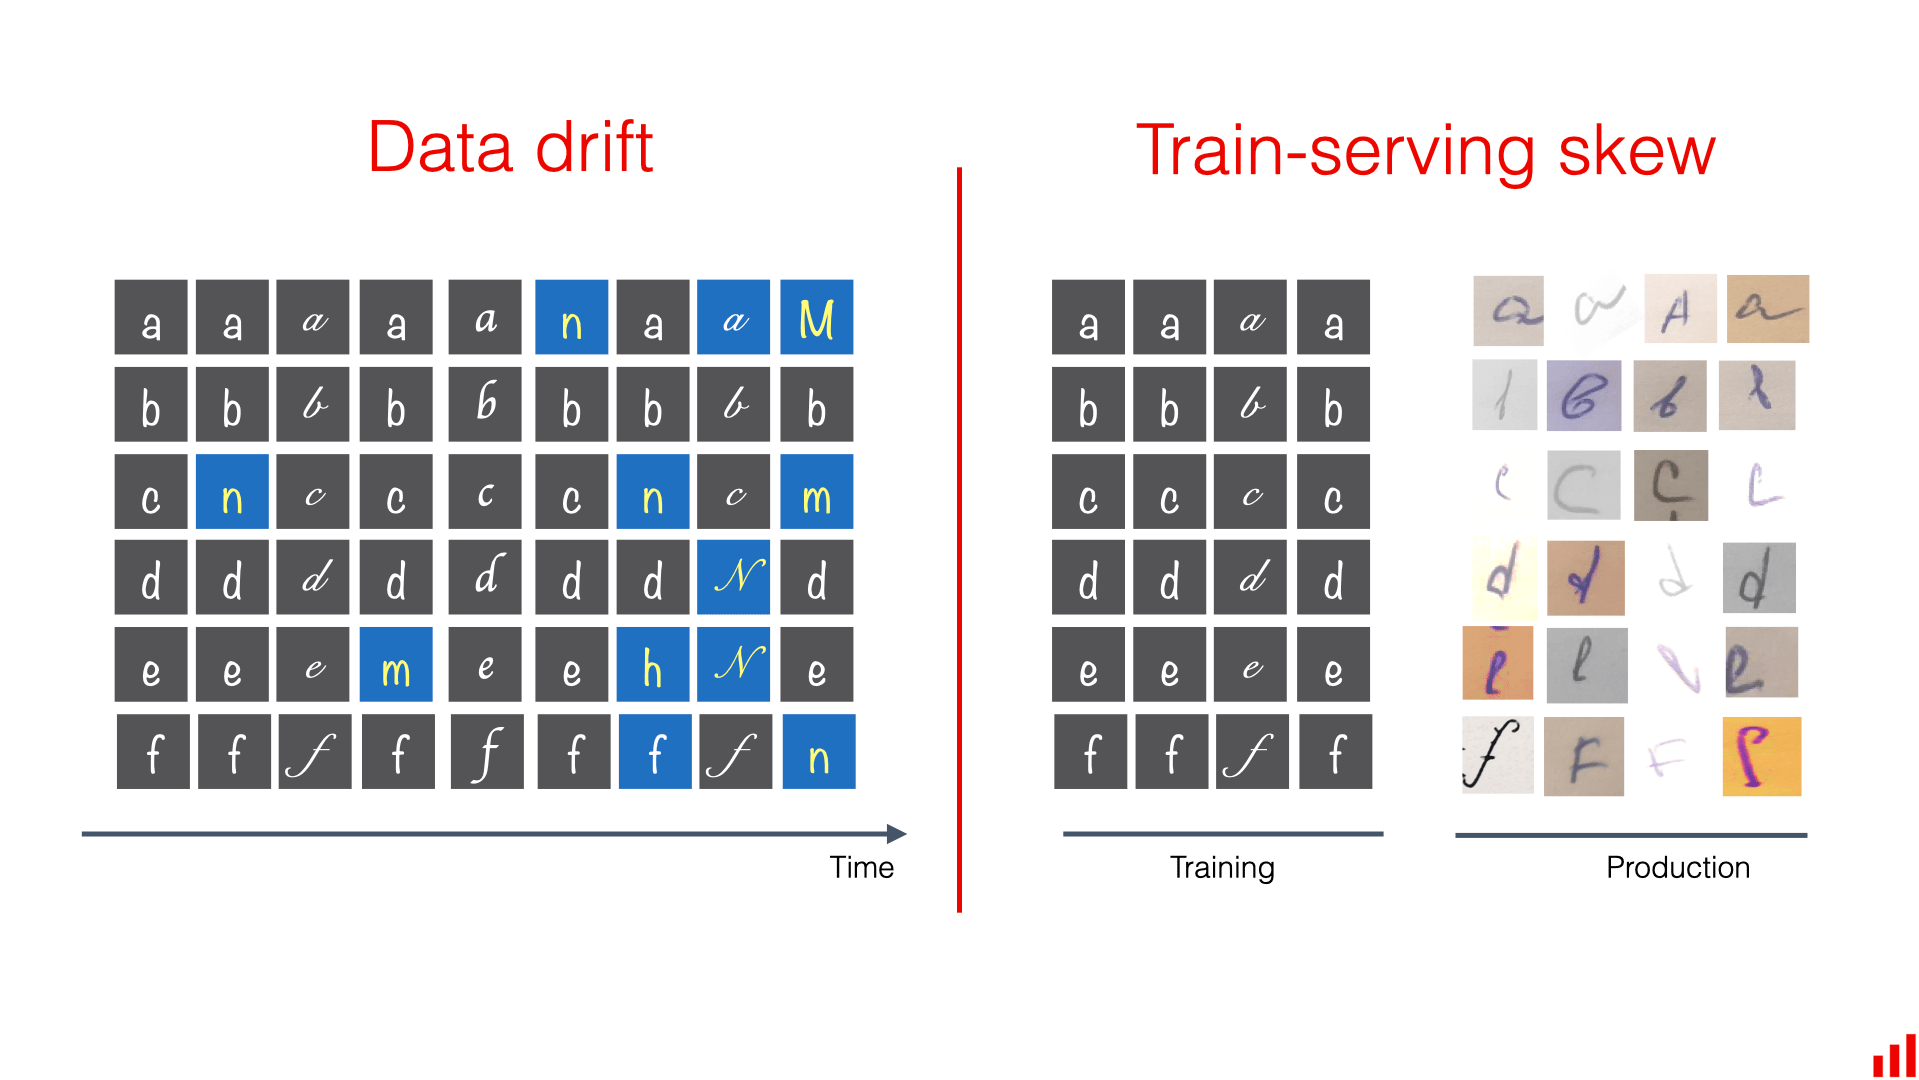

For example, you can encounter a training-serving skew when the features available in training are not possible to compute in production or come with a delay. The model won't be able to perform as well if it lacks important attributes it was trained to consider.

You might also face training-serving skew if you train the model on a synthetic or external dataset that does not fully match the model application environment.

**The difference:** data drift refers to the gradual change in the input data distributions. Training-serving skew refers to the mismatch visible shortly after the start of the model production use and can include issues unrelated to the changes in the environment.

**The similarity:** in both cases, we refer to the changes in the input data. You might use similar distribution comparison techniques to detect input data drift and training-serving skew by contrasting production data with training.



## Data drift vs. Data quality



> **TL;DR.** Data drift refers to the change in data distributions in otherwise valid data. Data quality issues refer to the data bugs, inconsistencies, and errors.



Broadly speaking, data drift can include all sorts of changes and anomalies in data. For instance, you can consider changes in the data schema, missing values, inconsistent formatting, or incorrect inputs as examples of “data drift.” This is often the case in domains outside machine learning, such as database management and data analysis.

However, it is often beneficial to distinguish between **data quality** issues and **data drift** in machine learning. They have different implications and solutions.

**Data quality** issues refer to corrupted and incomplete data that might occur, for example, due to pipeline bugs or data entry errors. **Data drift** refers to the change in distributions in otherwise correct and valid data that might occur due to environmental shifts.

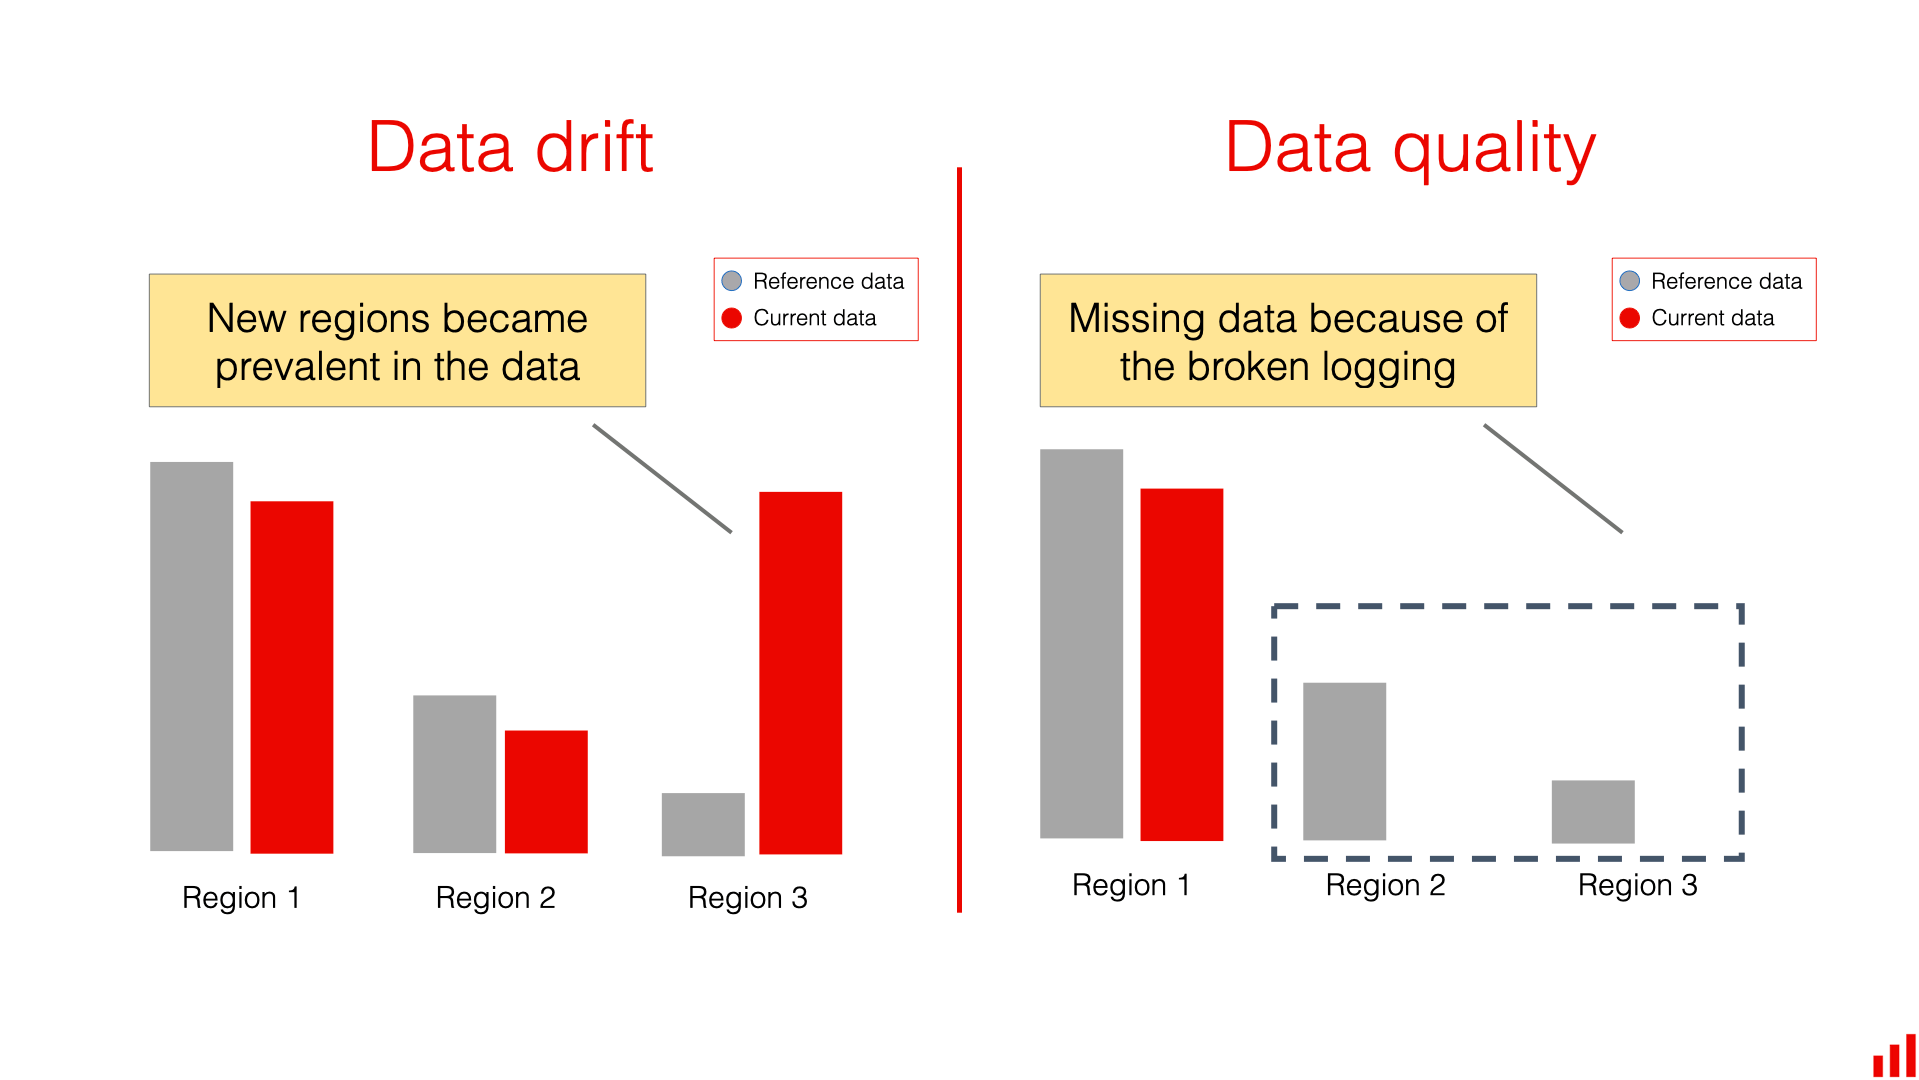

When you detect data distribution shifts, you can often attribute it to data quality issues. For example, if there is an accidental change in the feature scale due to entry error, you will notice a statistical shift in the distribution. Because of this, it helps to divide the two groups of checks. First, you verify the data quality, such as whether the data is complete, relevant features remain non-negative, etc. Then, you apply data distribution checks to see if there is a statistical shift in the feature pattern. Otherwise, whenever drift is detected, you'd need first to discard data quality issues as a possible root cause.

**The difference:** Data quality concerns issues like missing values or errors in the data. Data drift refers to statistical changes in the data distribution, even if the data has high quality. Data quality issues can lead to observed data drift, but they are not the same thing.

**The similarity:** Both data quality issues and data drift can lead to model quality drops, and both refer to the changes in the data. Data drift detection techniques can often expose data quality issues.

# Why is data drift important?

Data drift is an important concept in production machine learning for a few reasons.

First, conceptually understanding that distribution drift can – and will – happen helps prepare to maintain the production ML model quality through model monitoring and retraining.

Second, tracking data distribution drift can be a technique to monitor the model quality in production when ground truth or true labels are unavailable.

Lastly, data drift analysis can help interpret and debug model quality drops and understand changes in the model environment.

## Model maintenance



> TL;DR. Machine learning models are not "set it and forget it" solutions. Data will shift with time, which requires a model monitoring and retraining process.



You typically train ML models on specific datasets, expecting they'll perform well on unseen, real-world data. However, assuming that the data will remain static is often unrealistic.

Even if there are no drastic changes and events like significant marketing campaigns or COVID-19, you can expect minor variations to accumulate over time. For example, in sales demand forecasting for hundreds or thousands of different items, you can always expect new products to appear and customer preferences and market conditions to evolve.

As a result, complex real-world data will always deviate from the training data used sooner or later. Data (and concept) drift are in-built properties of a machine learning system – which explains the need for ongoing model maintenance.

Typically, you can combat this by regularly retraining the models on the new data to help the model stay up to date. This means you need to design a model update process and retraining schedule.

Additionally, you need a robust model monitoring setup to provide visibility into the current model quality and ensure you can intervene in time. This helps detect model quality issues in between updates or design the retraining process to happen on a trigger.

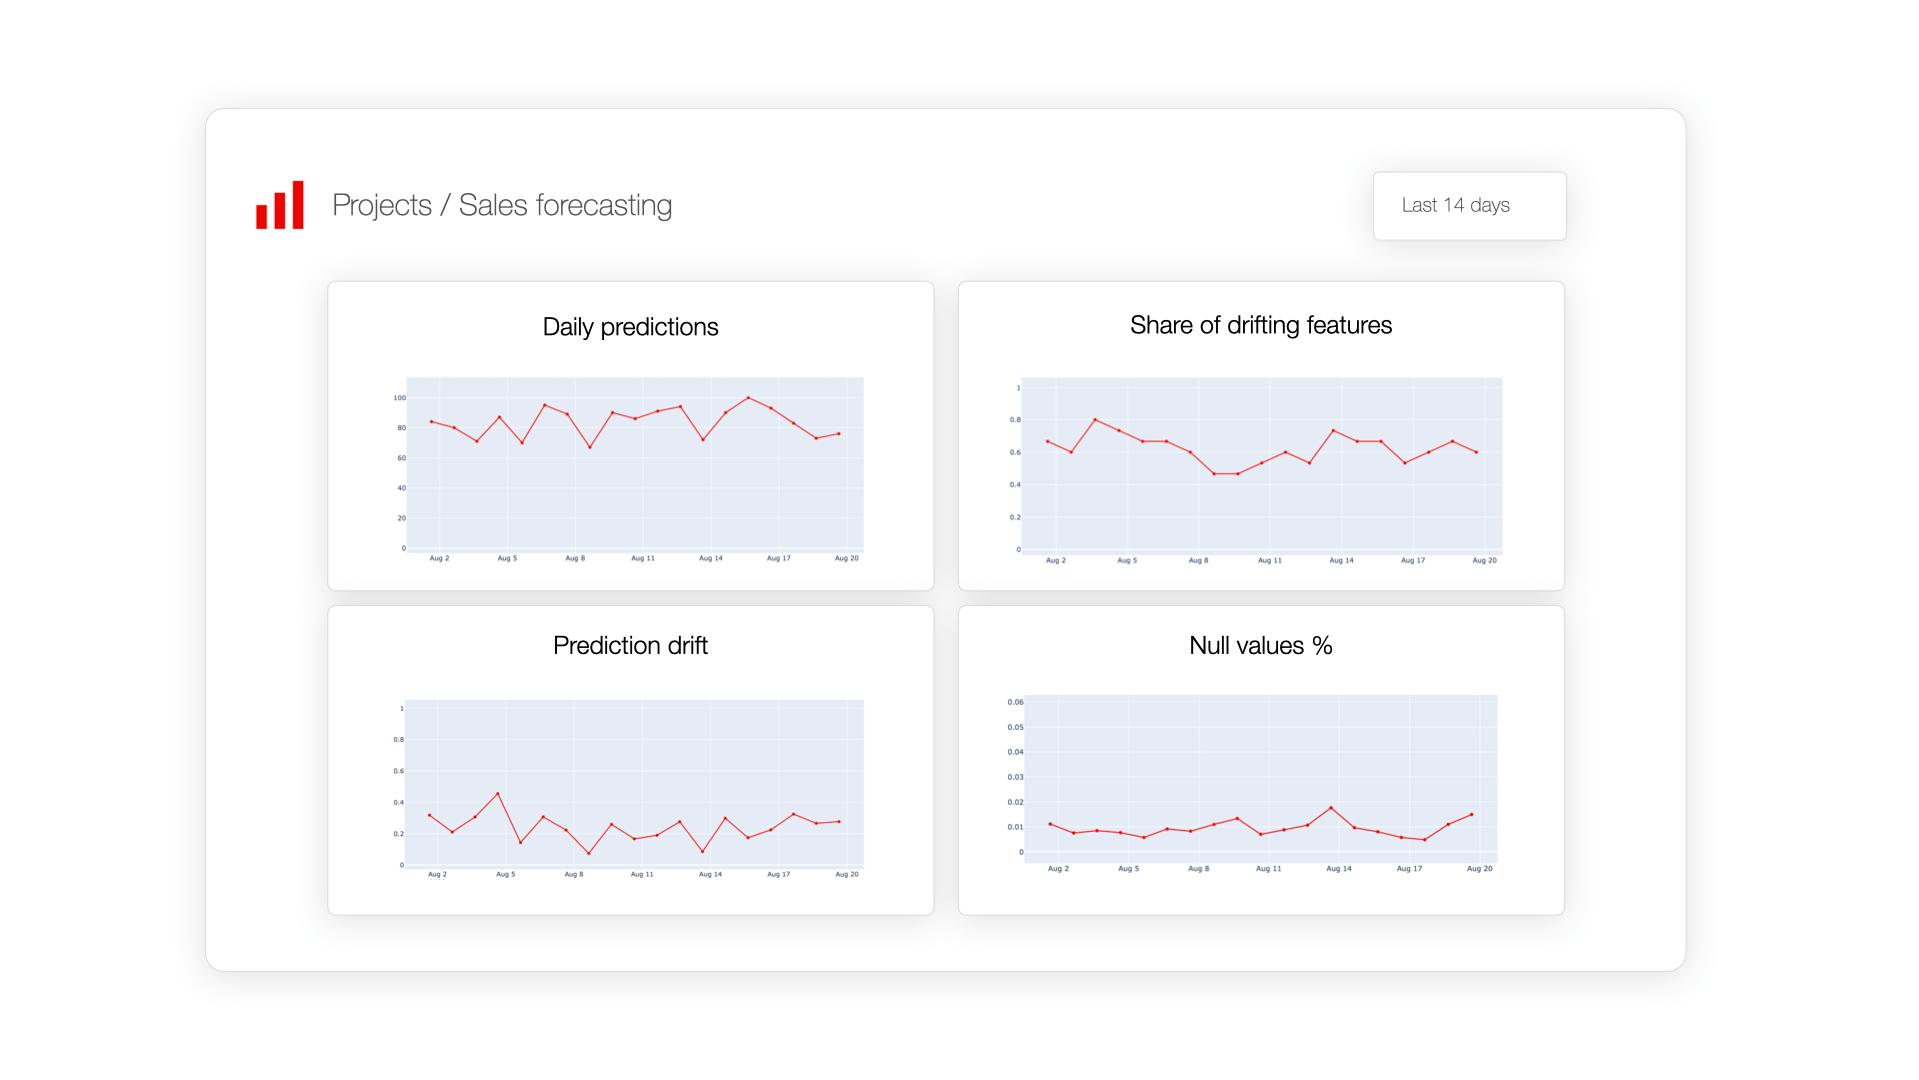

Tracking the true model quality (accuracy, mean error, etc.) is usually the best way to detect changes in the model. However, it is also not always possible to measure the model quality directly due to feedback delays. In this case, you might need to design early monitoring using proxy metrics – and tracking data distribution drift is one of the options.

## Model debugging



> TL;DR. Analyzing input data distribution drift helps explain and locate the reasons for model quality drops, as well as notice important changes in the modeled process.



Evaluating data drift is also a useful technique for model troubleshooting and debugging. If you observe a model quality drop through a direct metric like accuracy, your next step is investigating the underlying cause. This usually boils down to looking for changes in the input data.

Data drift analysis helps understand and contextualize the changes in the model features and locate the source. In this scenario, you might not use drift detection as an alerting signal – however, you can employ the data drift analysis when debugging.

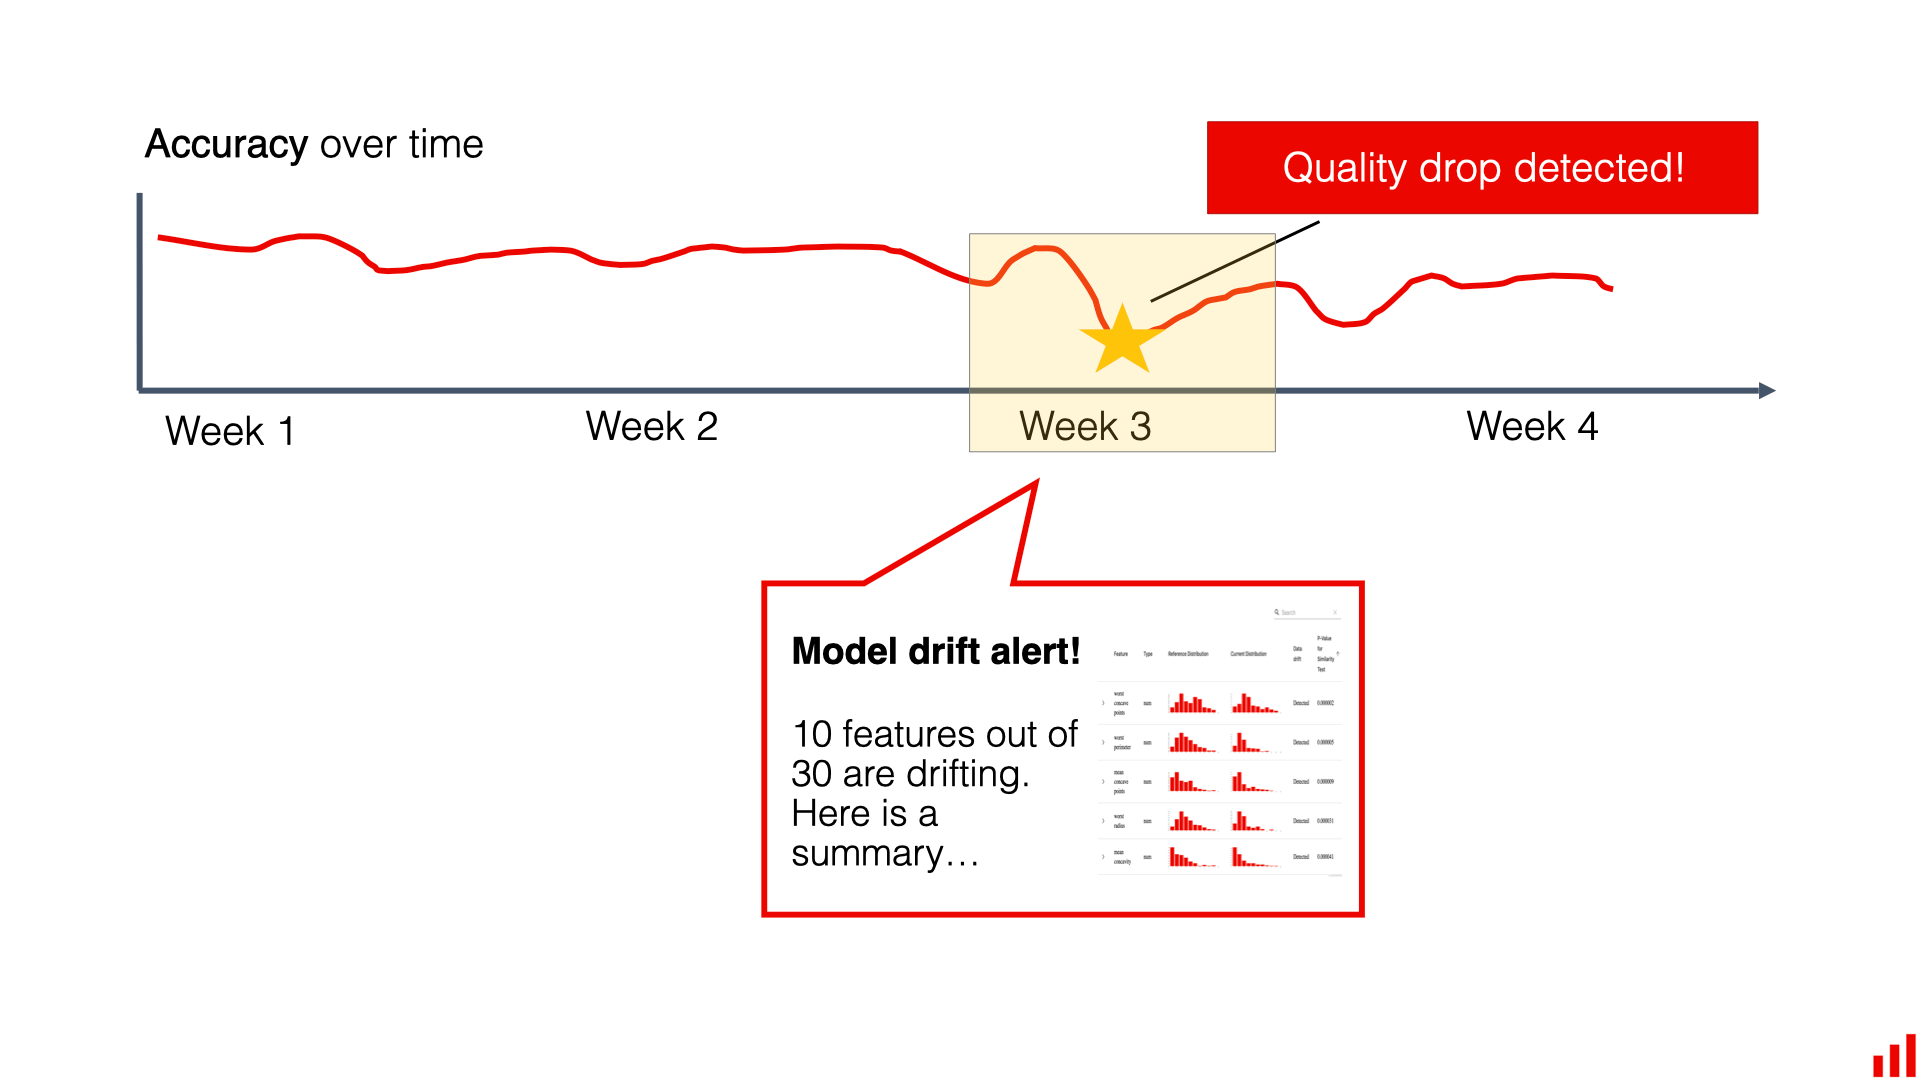

A simple approach is to run checks for per-feature distribution comparison and identify which features have shifted most significantly. Then, you can visually explore their distributions to interpret the change using your domain knowledge. Are users coming from a new source? Is there a new product group absent in the training data?

For example, you might notice a shift in a particular categorical feature that helps identify a new emerging user segment. You might also detect uncommunicated changes to the modeled process, such as new products added to the marketing promotions or users in new locations.

# How to detect data drift

As we explored earlier, comparing the distributions of the input features and model output helps with early monitoring and debugging ML model decay.

But how exactly do you detect a change in the distributions? How “different” is different enough? Let’s review some of the possible methods.

## Statistical tests

A more advanced drift detection approach involves using statistical hypothesis testing. For example, you can use tests like **Kolmogorov Smirnov** for numerical features or the **Chi-square test** for categorical attributes. They help assess whether the difference between the two datasets is statistically significant.

If the difference is detected, it suggests that the two datasets come from distinct distributions rather than random variation due to sampling. The output (and a “drift score”) of a statistical test is a **p-value** that serves as a “measure of confidence.”

You might also need to consider the specifics of the data distribution to pick an appropriate test: for example, whether you expect the distribution to be normal.

Detecting drift in individual features using statistical distribution tests often makes sense when you have a small number of important and interpretable features and deal with smaller datasets and high-stakes use cases like healthcare or education.

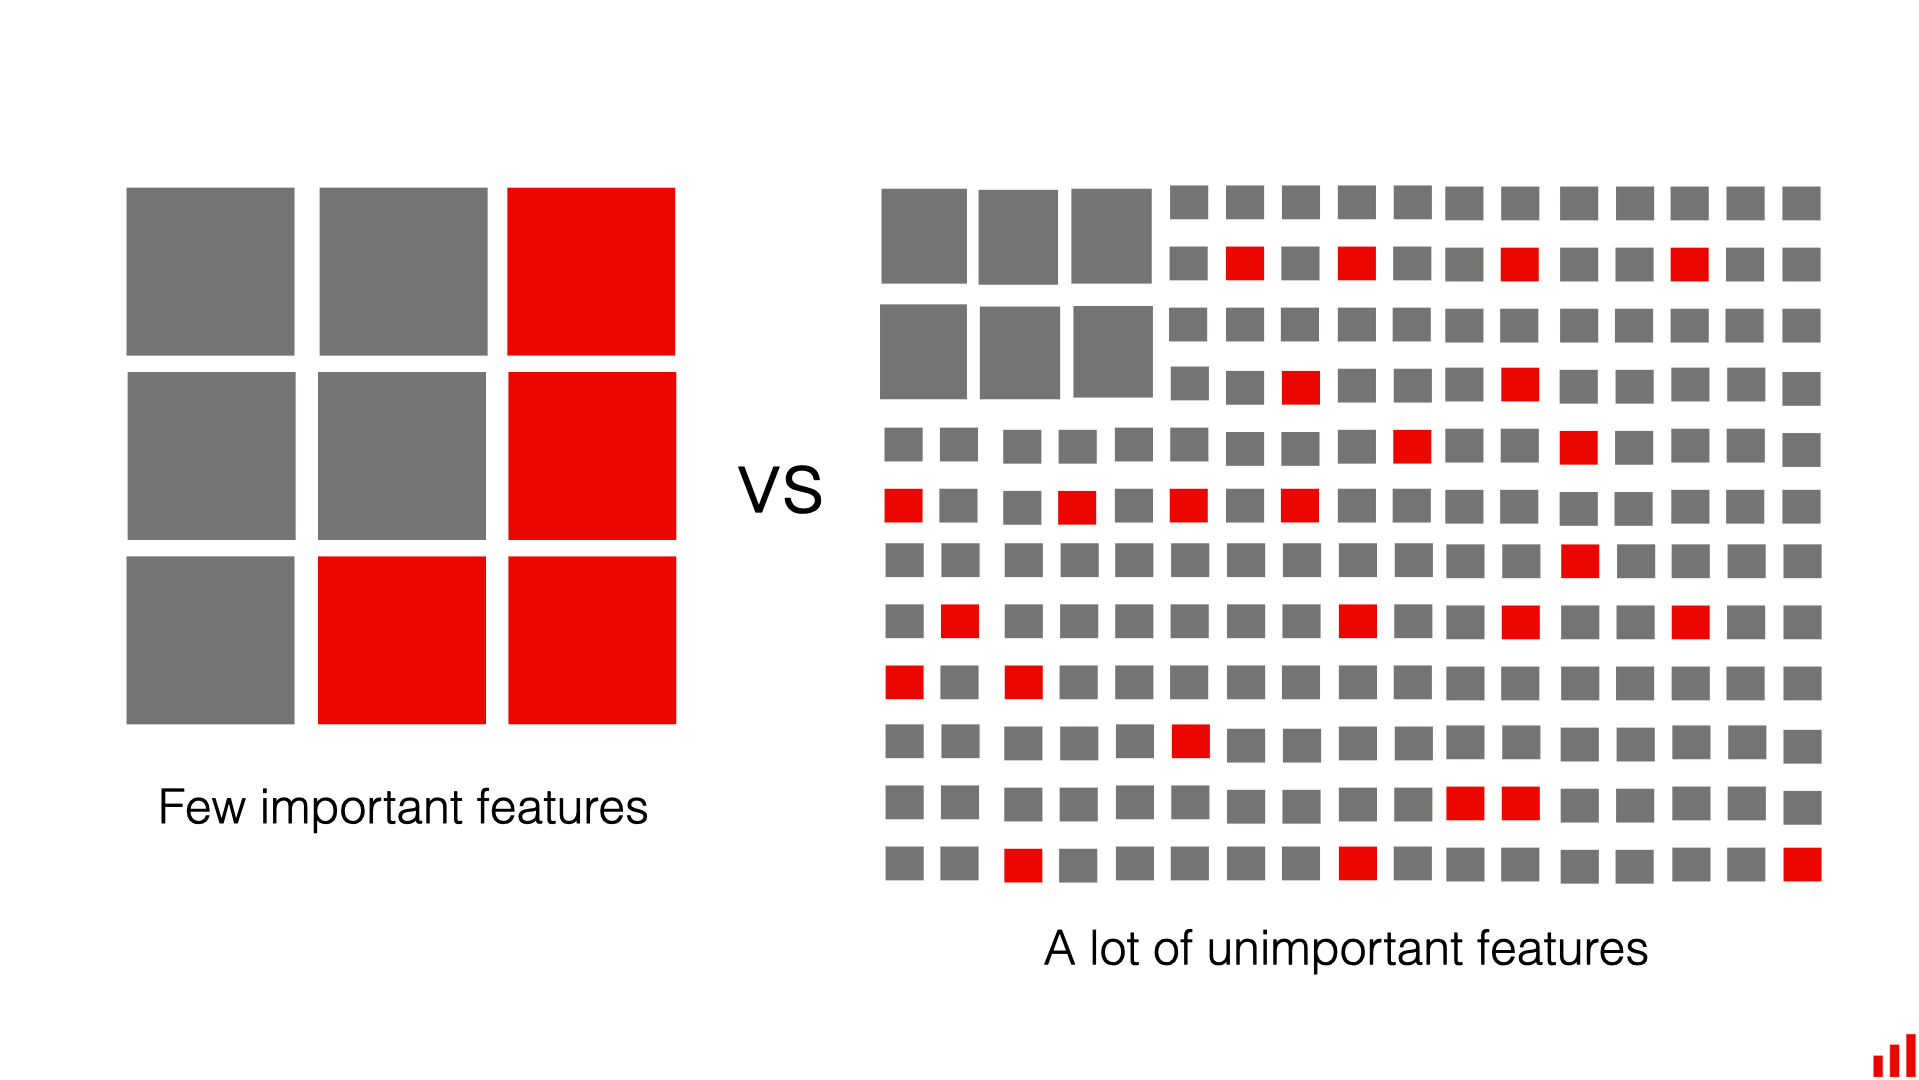

However, it's essential to remember that a statistically significant difference may not always be practically significant. A useful rule of thumb is that if you can detect the difference with a relatively small sample, it's likely important. Otherwise, the tests may be overly sensitive.

## Distance metrics

Another approach involves using distance metrics that quantitatively measure how far apart the distributions are. Distance metrics are valuable for understanding the extent of drift. A few commonly used distance metrics are Wasserstein Distance, Jensen-Shannon Divergence, or Population Stability Index (PSI), often used in credit risk modeling.

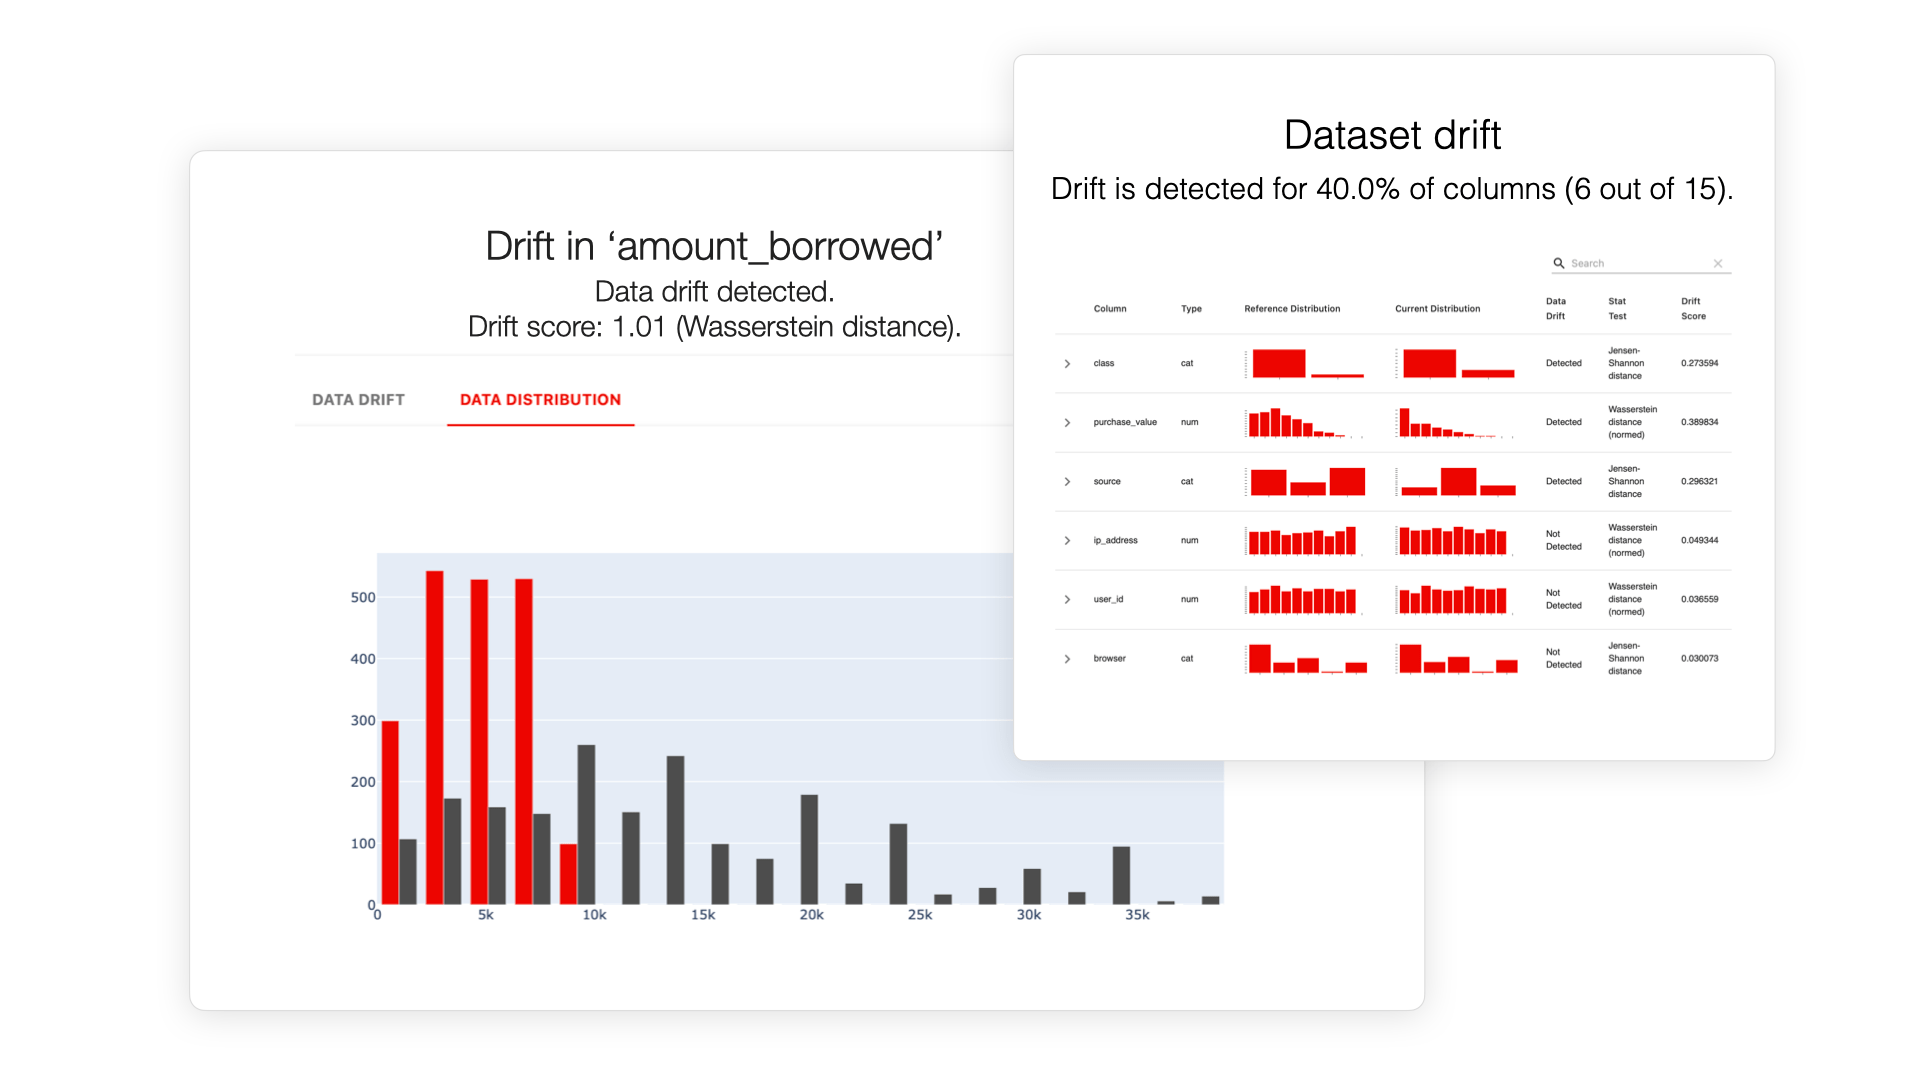

The output (the “drift score”) is usually a distance or divergence. The higher the value, the further apart the distributions are. Depending on the metric, you might work with an absolute scale or a scale from 0 to 1.

The benefit of this approach is that it allows quantifying the change rather than testing the assumption that both samples come from the same distribution. You can treat the resulting metric as a reflection of “drift size” that you can observe over time.

When dealing with a large dataset, it is advisable to use distance metrics since statistical tests are likely to be overly sensitive in such scenarios. You can also choose to monitor “aggregate” drift by tracking the share of drifted features in the dataset as opposed to individual feature drifts.